In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from wordcloud import WordCloud,STOPWORDS
from collections import Counter 
%matplotlib inline

In [2]:
df=pd.read_csv("/kaggle/input/tweets-onchatgpt-chatgpt/ChatGPT.csv")

/tmp/ipykernel_34/299525578.py:1: DtypeWarning: Columns (0,6,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/kaggle/input/tweets-onchatgpt-chatgpt/ChatGPT.csv")


In [3]:
mask=np.array(Image.open("/kaggle/input/wordcloud-mask-collection/stormtrooper_mask.png"))

In [4]:
df=df[: 50000]

In [5]:
df.head()

Unnamed: 0                       Date  \
0          0  2023-04-08 03:33:13+00:00   
1          1  2023-04-08 03:32:16+00:00   
2          2  2023-04-08 03:32:05+00:00   
3          3  2023-04-08 03:31:08+00:00   
4          4  2023-04-08 03:30:51+00:00   

                                               Tweet  \
0  #ChatGPT If only there were a movie or somethi...   
1  Workshop Description: In this workshop, you wi...   
2  New Post at AiNewsDrop!\n\nChatGPT is a doctor...   
3  OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...   
4  "Classical art" is struggling - not changed th...   

                                                 Url           User  \
0  https://twitter.com/kirbydjohnson/status/16445...  kirbydjohnson   
1  https://twitter.com/UniversityWeb/status/16445...  UniversityWeb   
2  https://twitter.com/AiNewsDrop/status/16445436...     AiNewsDrop   
3  https://twitter.com/tubeblogger/status/1644543...    tubeblogger   
4  https://twitter.com/majorradic/status/16445432...     majorradic   

                 UserCreated UserVerified  UserFollowers  UserFriends  \
0  2012-07-29 22:57:46+00:00        False           50.0         76.0   
1  2013-01-13 20:18:16+00:00        False         9056.0        387.0   
2  2022-01-19 06:25:45+00:00        False          276.0        313.0   
3  2013-06-25 01:42:59+00:00        False          312.0        293.0   
4  2011-12-12 01:29:15+00:00        False          522.0        684.0   

  Retweets Likes         Location  \
0      0.0     0              NaN   
1      0.0     0              NaN   
2      0.0     0              NaN   
3      0.0     0     The Internet   
4      0.0     2  Beograd Navodni   

                                         Description  
0                                                NaN  
1  University webinars, speech videos, & news for...  
2  I'm up almost 24/7 hunting for AI News\n\nWith...  
3  Exploring the Best Of The Web. Tech, Games, Ar...  
4  Mediji i milosrdje\n\n                        ...

In [6]:
df.shape

(50000, 13)

In [7]:
df.isnull().sum()

Unnamed: 0           5
Date                 0
Tweet                5
Url                  5
User                 5
UserCreated          5
UserVerified         5
UserFollowers        5
UserFriends          5
Retweets             5
Likes                5
Location         11851
Description       2190
dtype: int64

In [8]:
df.dropna(inplace=True)


In [9]:
df.isnull().sum()

Unnamed: 0       0
Date             0
Tweet            0
Url              0
User             0
UserCreated      0
UserVerified     0
UserFollowers    0
UserFriends      0
Retweets         0
Likes            0
Location         0
Description      0
dtype: int64

In [10]:
df.head()

Unnamed: 0                       Date  \
3          3  2023-04-08 03:31:08+00:00   
4          4  2023-04-08 03:30:51+00:00   
5          5  2023-04-08 03:30:00+00:00   
6          6  2023-04-08 03:28:59+00:00   
7          7  2023-04-08 03:28:31+00:00   

                                               Tweet  \
3  OpenAI’s GPT-4 Just Got Supercharged! #ai #Cha...   
4  "Classical art" is struggling - not changed th...   
5  Alibaba invites businesses to trial 'ChatGPT r...   
6  Trying to stop students from using #AI and #ch...   
7  I Asked ChatGPT's AI Chatbot How Can I Earn Cr...   

                                                 Url            User  \
3  https://twitter.com/tubeblogger/status/1644543...     tubeblogger   
4  https://twitter.com/majorradic/status/16445432...      majorradic   
5  https://twitter.com/gadgetsnow/status/16445430...      gadgetsnow   
6  https://twitter.com/Sherab_Taye/status/1644542...     Sherab_Taye   
7  https://twitter.com/cryptoccentral/status/1644...  cryptoccentral   

                 UserCreated UserVerified  UserFollowers  UserFriends  \
3  2013-06-25 01:42:59+00:00        False          312.0        293.0   
4  2011-12-12 01:29:15+00:00        False          522.0        684.0   
5  2010-07-29 10:32:28+00:00         True        90392.0         56.0   
6  2010-05-10 12:40:40+00:00        False          338.0         53.0   
7  2023-01-27 00:12:12+00:00        False            1.0          2.0   

  Retweets Likes         Location  \
3      0.0     0     The Internet   
4      0.0     2  Beograd Navodni   
5      0.0     0        New Delhi   
6      0.0     0            World   
7      0.0     2    United States   

                                         Description  
3  Exploring the Best Of The Web. Tech, Games, Ar...  
4  Mediji i milosrdje\n\n                        ...  
5  The official technology news website of The Ti...  
6  Musician // Thinker // Metaphysical Dandy // f...  
7  Get the latest updates and insights on the cry...

In [11]:
df.shape

(37460, 13)

In [12]:
import re
df['Date'] = pd.to_datetime(df['Date'])
df['New_Date'] = pd.to_datetime(df['Date']).dt.date
df['Time'] = df['Date'].dt.time
df['Hour'] = df['Date'].dt.hour
df['Day'] = df['Date'].dt.strftime('%A')

df['TweetStr'] = df['Tweet'].astype(str)
df['hashtags'] = df['TweetStr'].apply(lambda x: re.findall(r"#(\w+)", x))

In [13]:
df.drop(columns="Unnamed: 0",axis=1,inplace=True)

In [14]:
df["New_Date"].value_counts()

New_Date
2023-03-30    3999
2023-03-31    3948
2023-03-29    3828
2023-03-28    3788
2023-04-04    3357
2023-04-05    3310
2023-04-03    3134
2023-04-06    3087
2023-04-01    2919
2023-04-07    2804
2023-04-02    2461
2023-03-27     616
2023-04-08     209
Name: count, dtype: int64

In [15]:
len(df["New_Date"].unique())

13

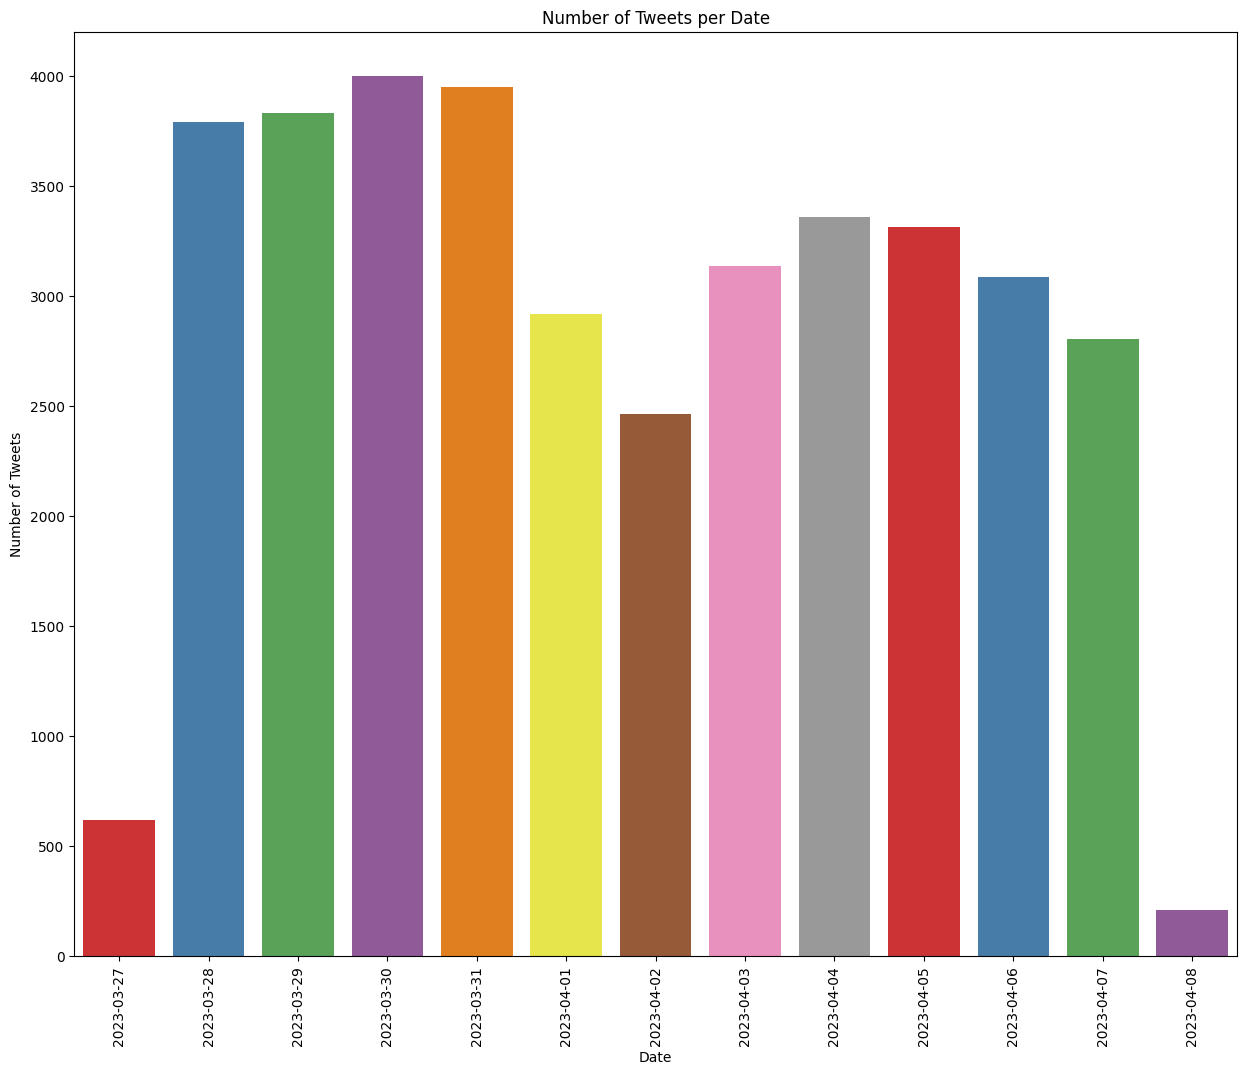

In [16]:
tweet_count=df["New_Date"][: 100000].value_counts().sort_index()
plt.figure(figsize=(15,12))
sns.barplot(x=tweet_count.index, y=tweet_count.values,palette="Set1")
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets per Date')
plt.xticks(rotation=90) 
plt.show()

In [17]:
df["User"].value_counts()

User
crypaudio      440
torksmith      352
yuhanito       352
JimyTuits      245
MostBay        206
              ... 
ANPrecision      1
TeddyLumidi      1
stacha_cl        1
AlanAtWTS        1
pritenmodi       1
Name: count, Length: 20809, dtype: int64

In [18]:
len(df["User"])

37460

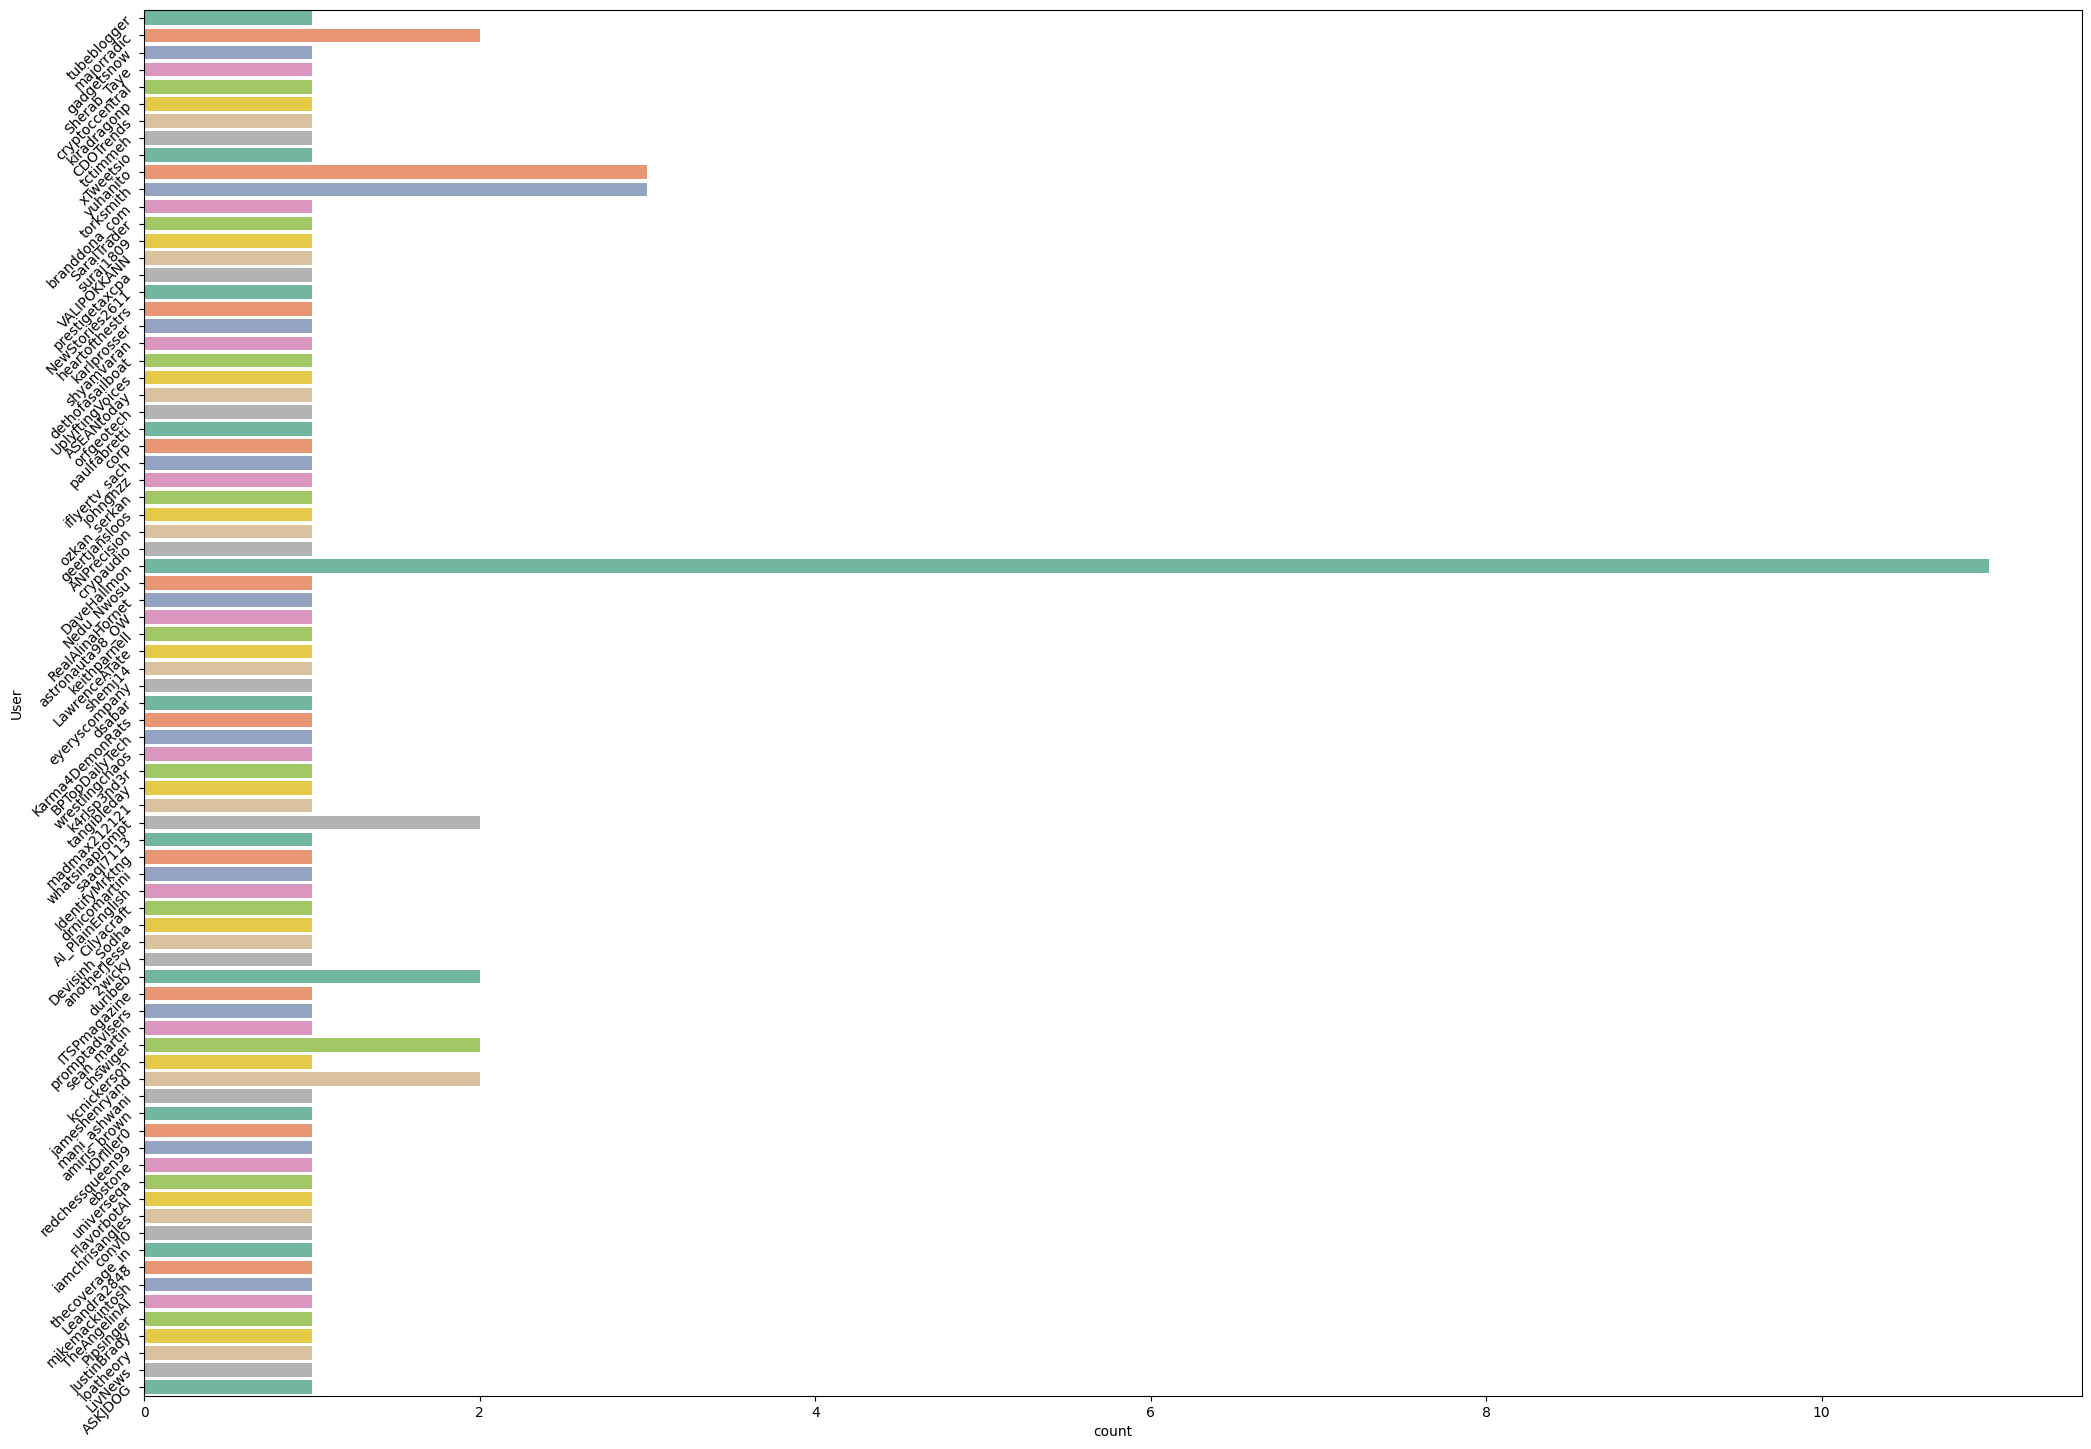

In [19]:
plt.figure(figsize=(25,18))
sns.countplot(y="User",data=df[: 100],palette="Set2")
plt.yticks(rotation=45)
plt.show()

In [20]:
df["UserVerified"].value_counts()

UserVerified
False    35660
True      1800
Name: count, dtype: int64

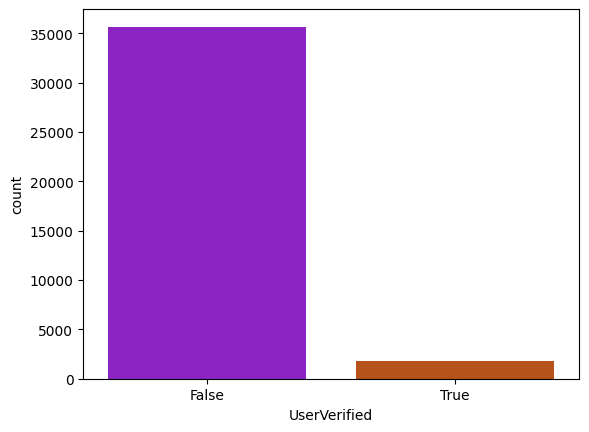

In [21]:
sns.countplot(x="UserVerified",data=df,palette="gnuplot")
plt.show()

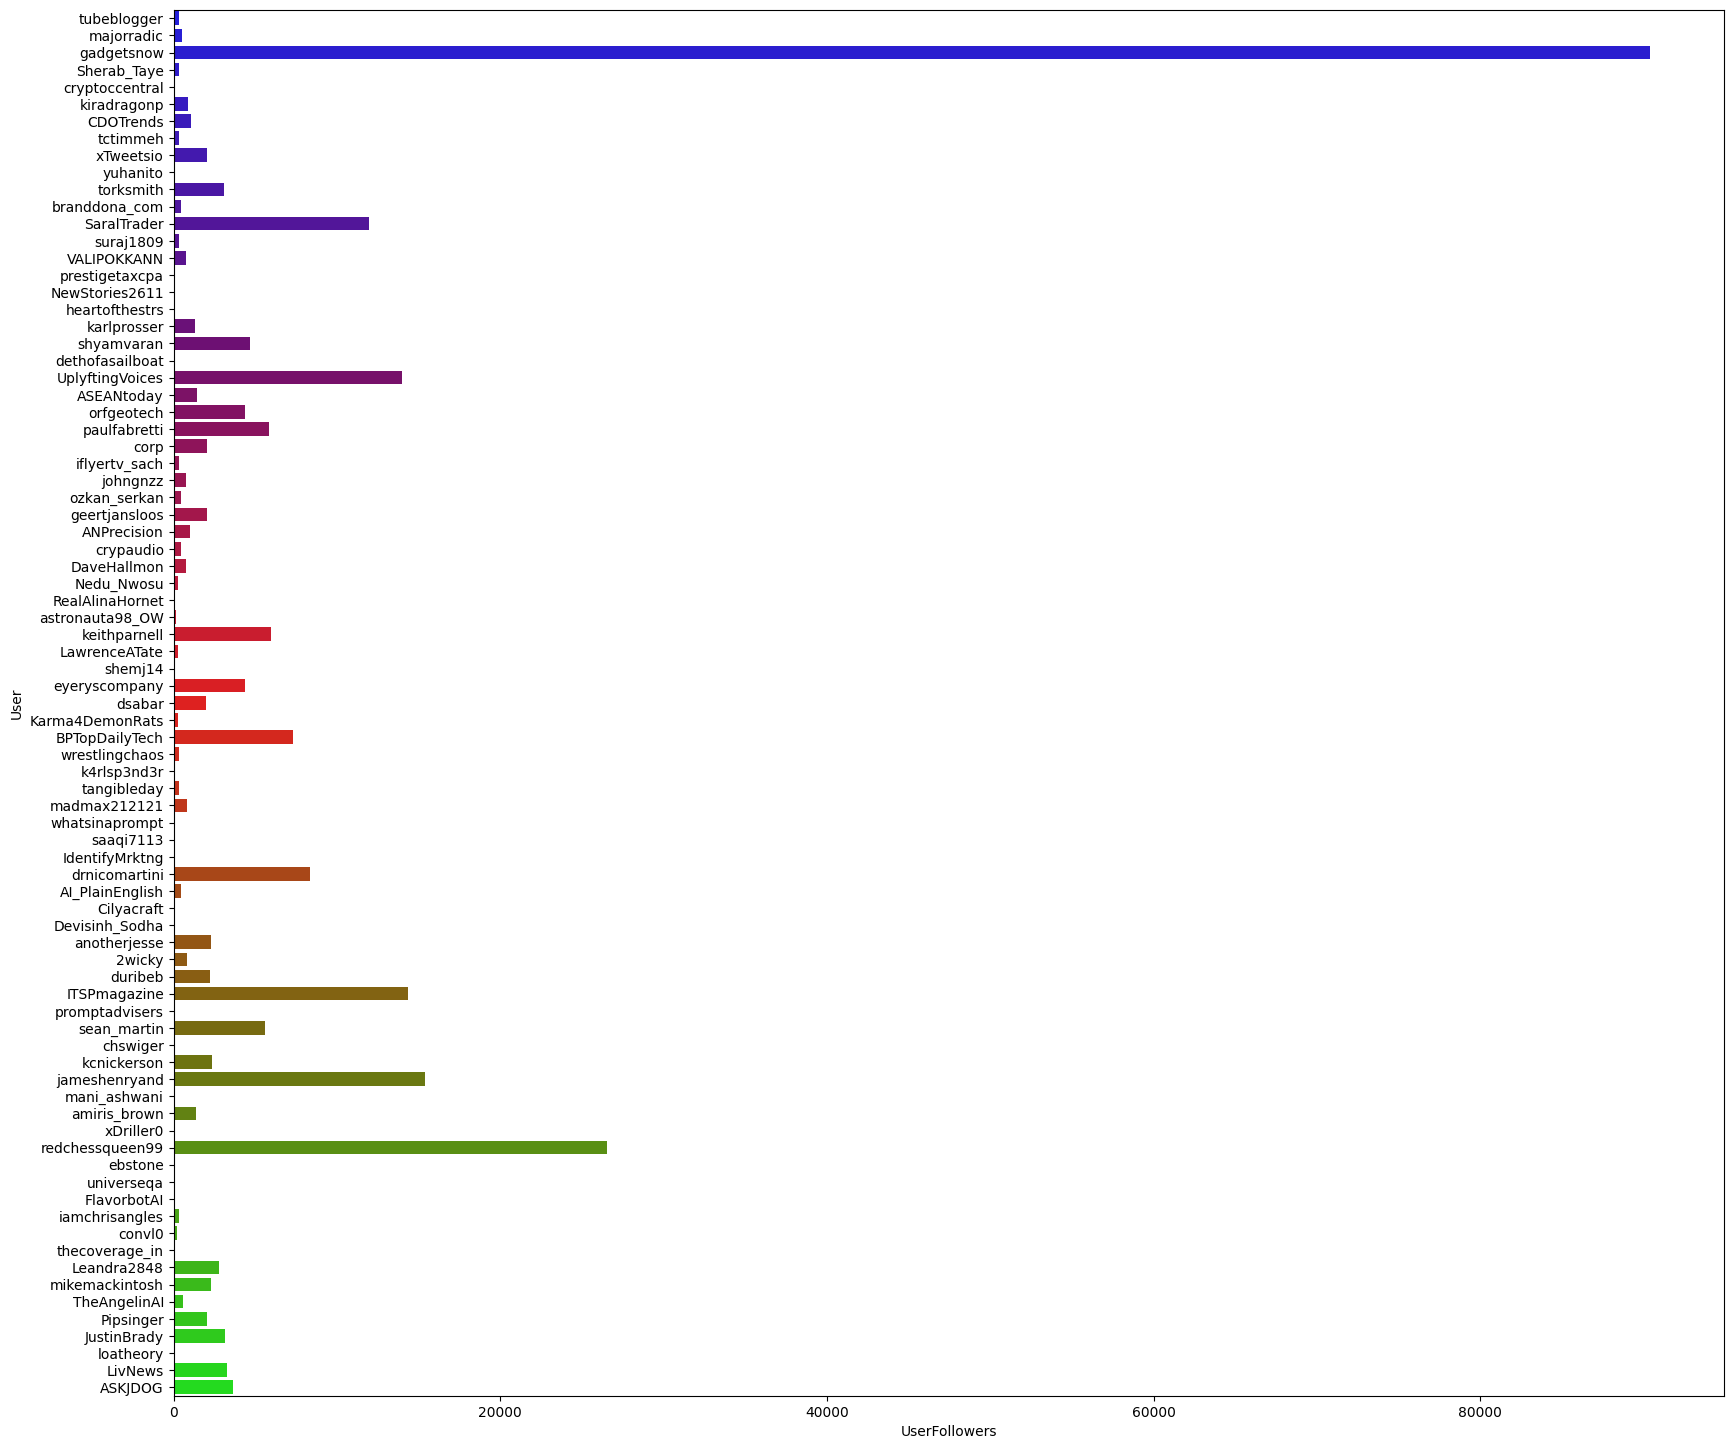

In [22]:
plt.figure(figsize=(20,18))
sns.barplot(df[: 100], y="User", x="UserFollowers",palette="brg")
plt.show()

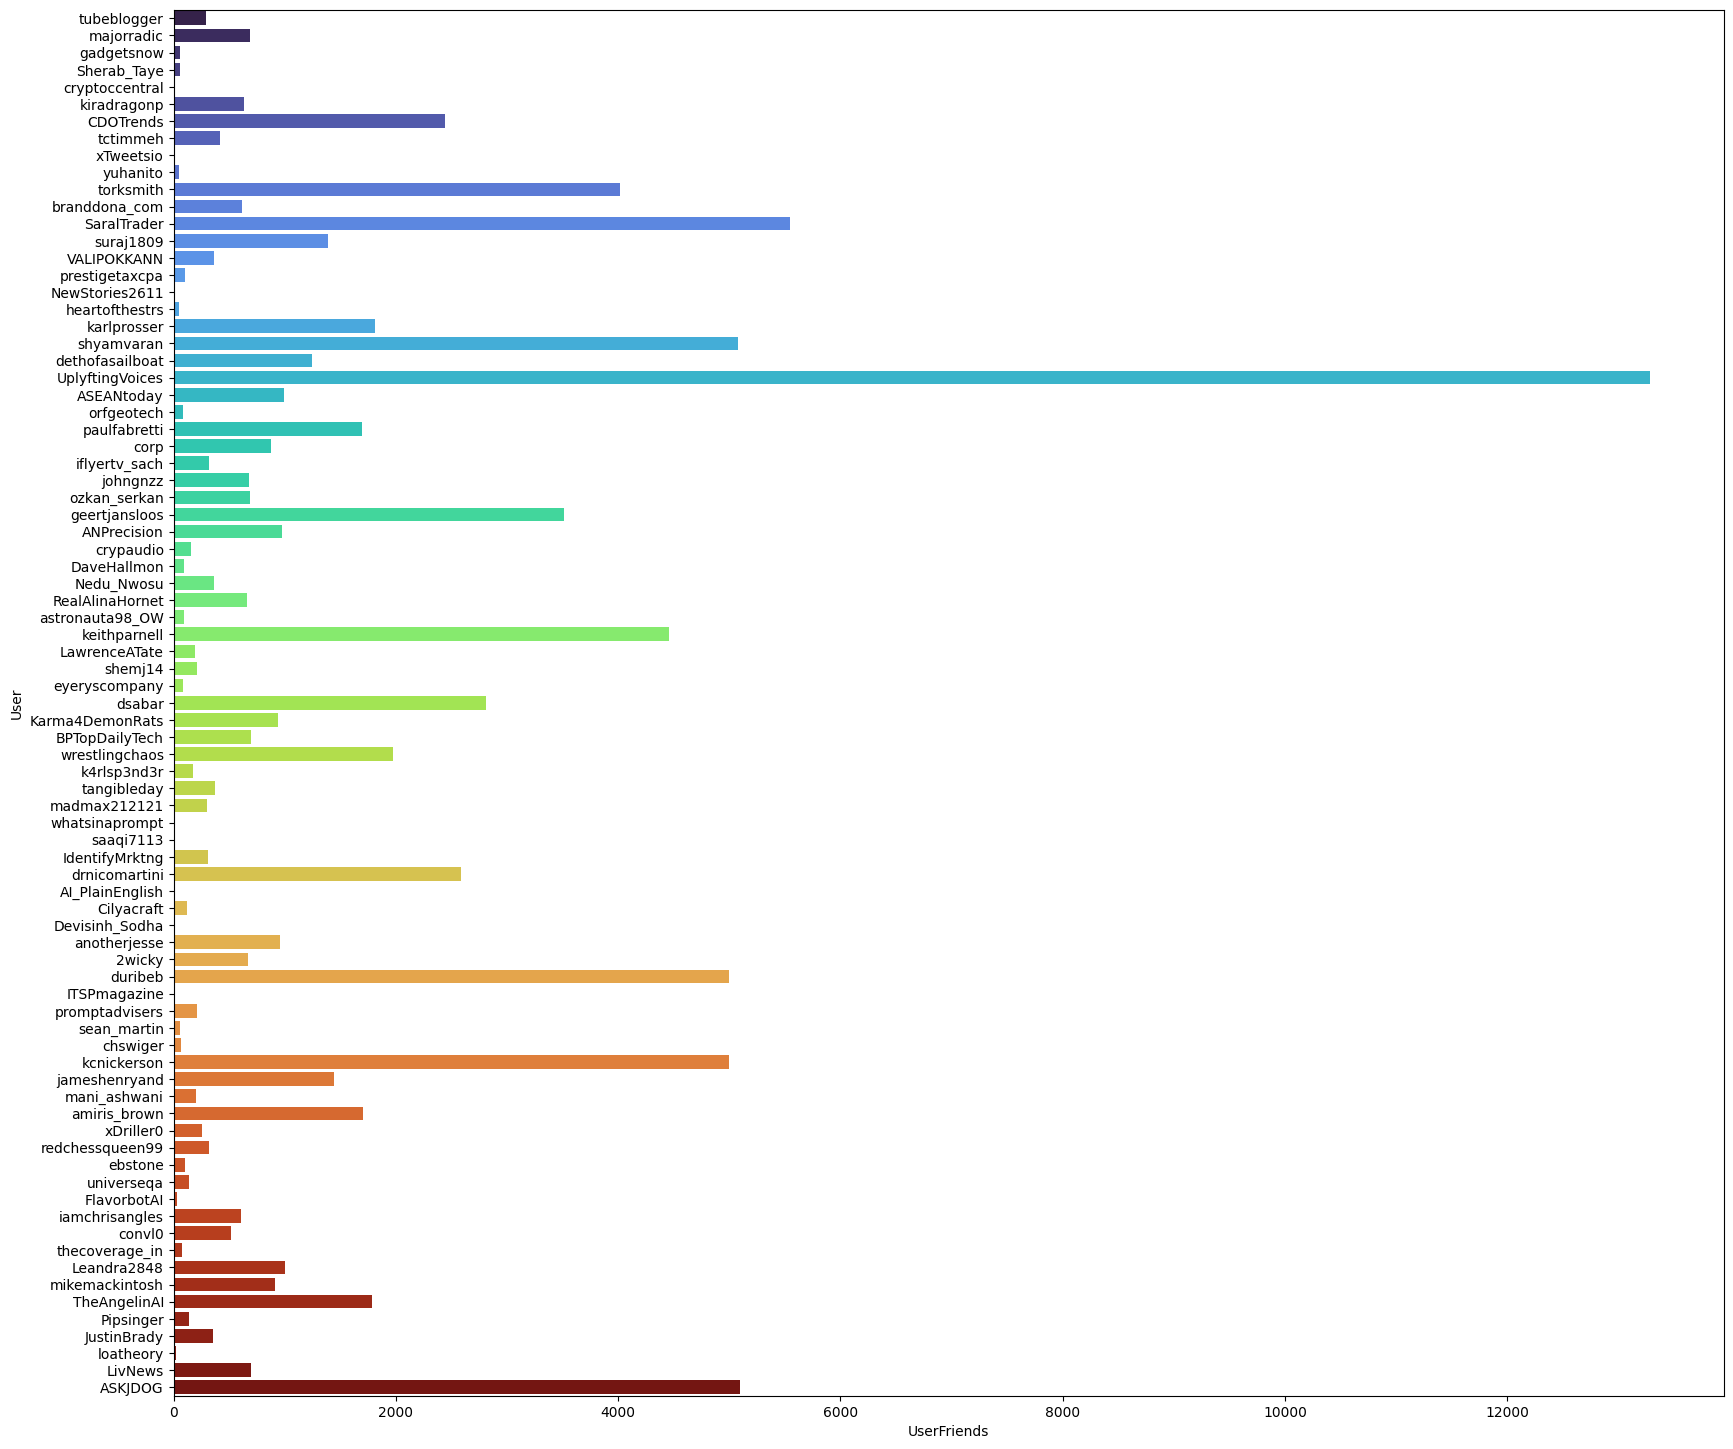

In [23]:
plt.figure(figsize=(20,18))
sns.barplot(df[: 100], y="User", x="UserFriends",palette="turbo")
plt.show()

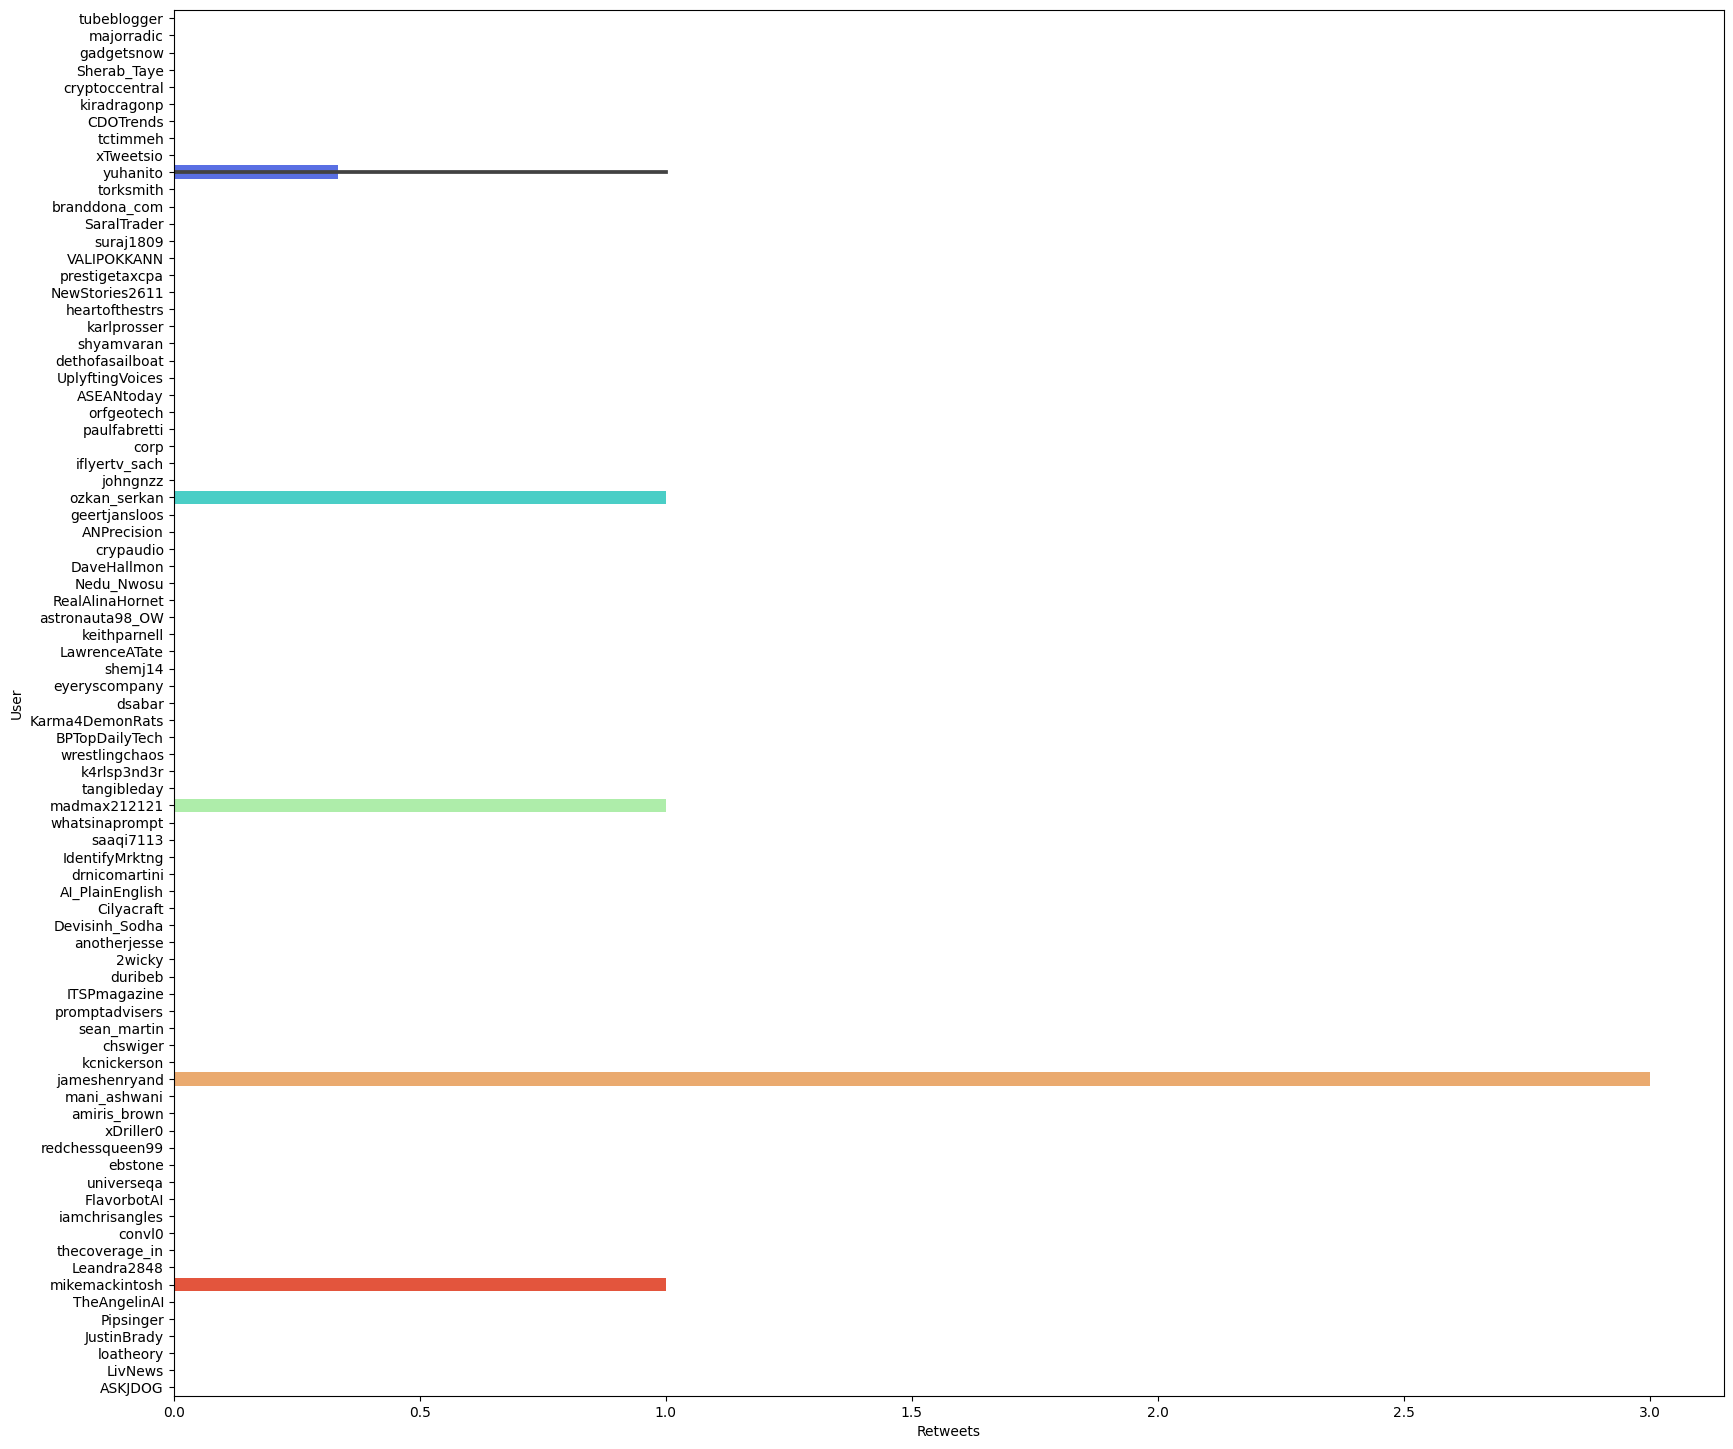

In [24]:
plt.figure(figsize=(20,18))
sns.barplot(df[: 100], y="User", x="Retweets",palette="rainbow")
plt.show()

In [25]:
print(df["Likes"].dtype)
df["Likes"] = df["Likes"].astype(int)  # Convert to float
print("=============================================")

object


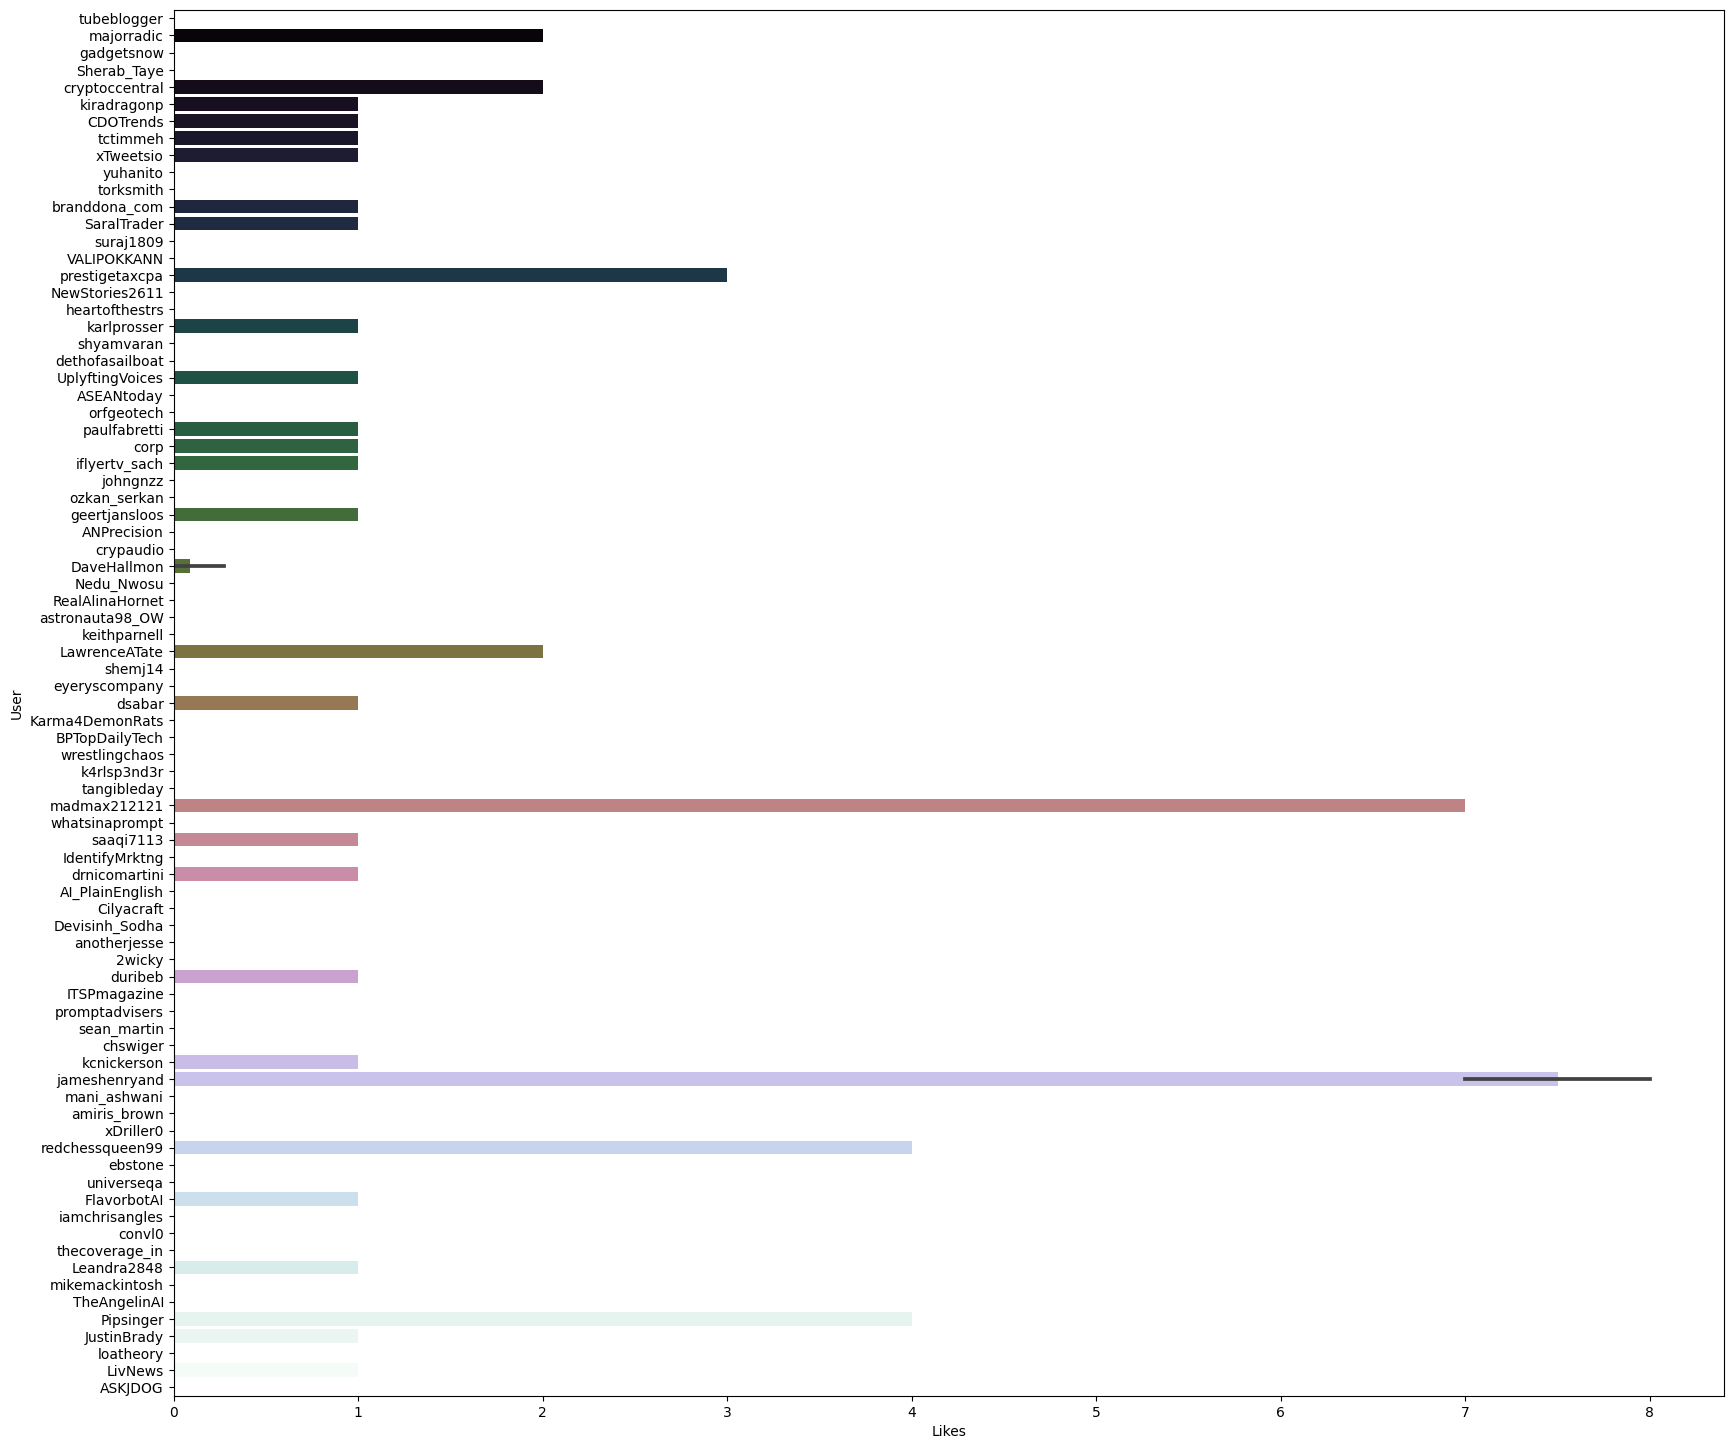

In [26]:
plt.figure(figsize=(20,18))
sns.barplot(df[: 100], y="User", x="Likes",palette="cubehelix")
plt.show()

In [27]:
df["Location"].value_counts()

Location
India                        760
Manchester, UK               710
United States                602
Global                       523
ChatGPT & AI News            440
                            ... 
LA / NYC / Sometimes SF        1
Crypto-twitter                 1
Geneva, Switzerland            1
Northern San Diego County      1
Sea Cliff, NY                  1
Name: count, Length: 8634, dtype: int64

In [28]:
len(df["Location"].unique())

8634

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127759 (\N{EARTH GLOBE ASIA-AUSTRALIA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


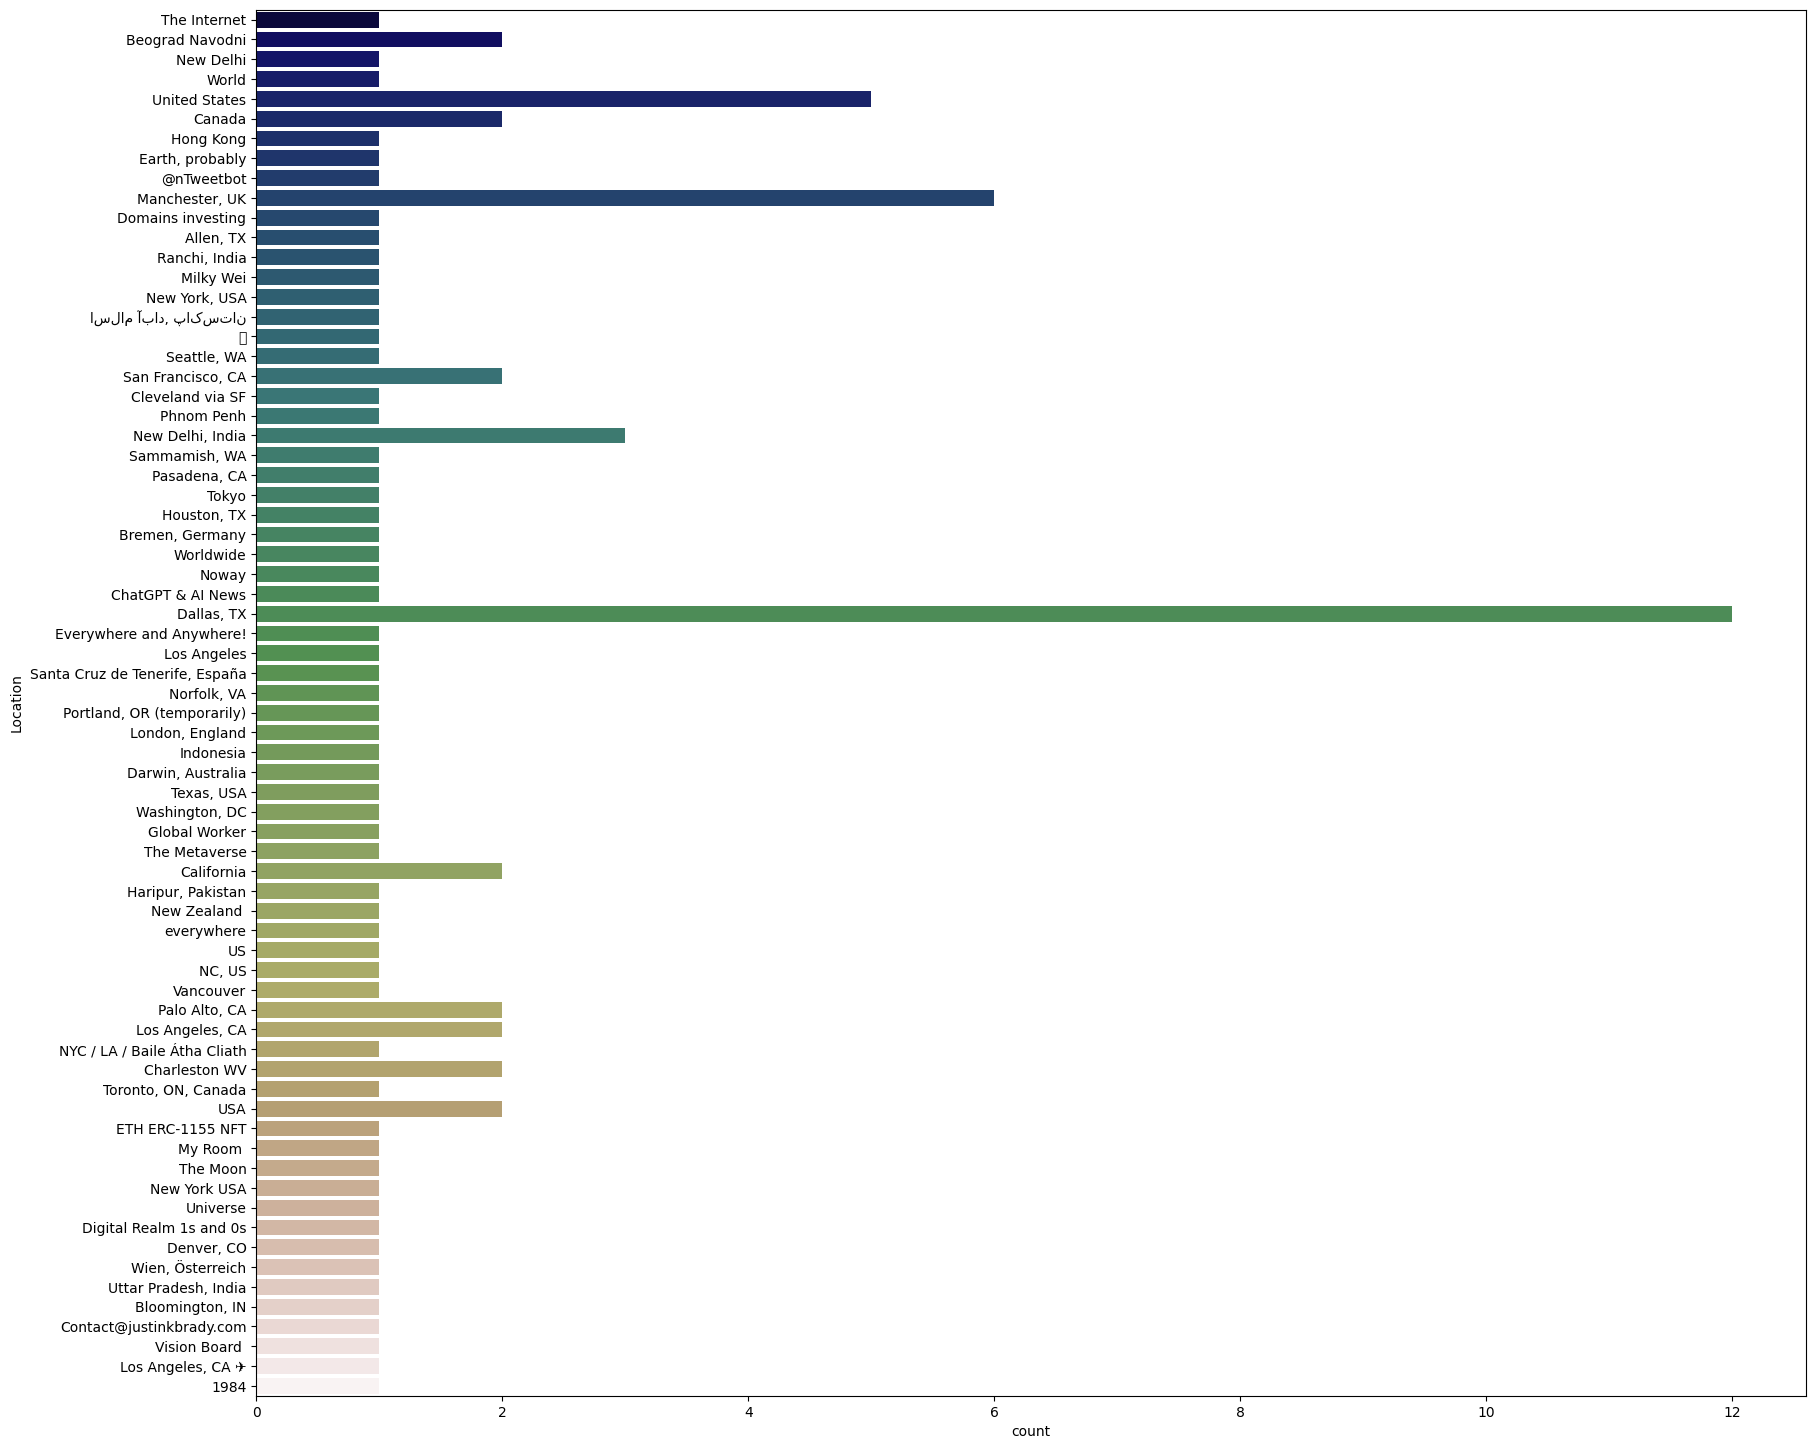

In [29]:
plt.figure(figsize=(20,18))
sns.countplot(y="Location",data=df[: 100],palette="gist_earth")
plt.show()

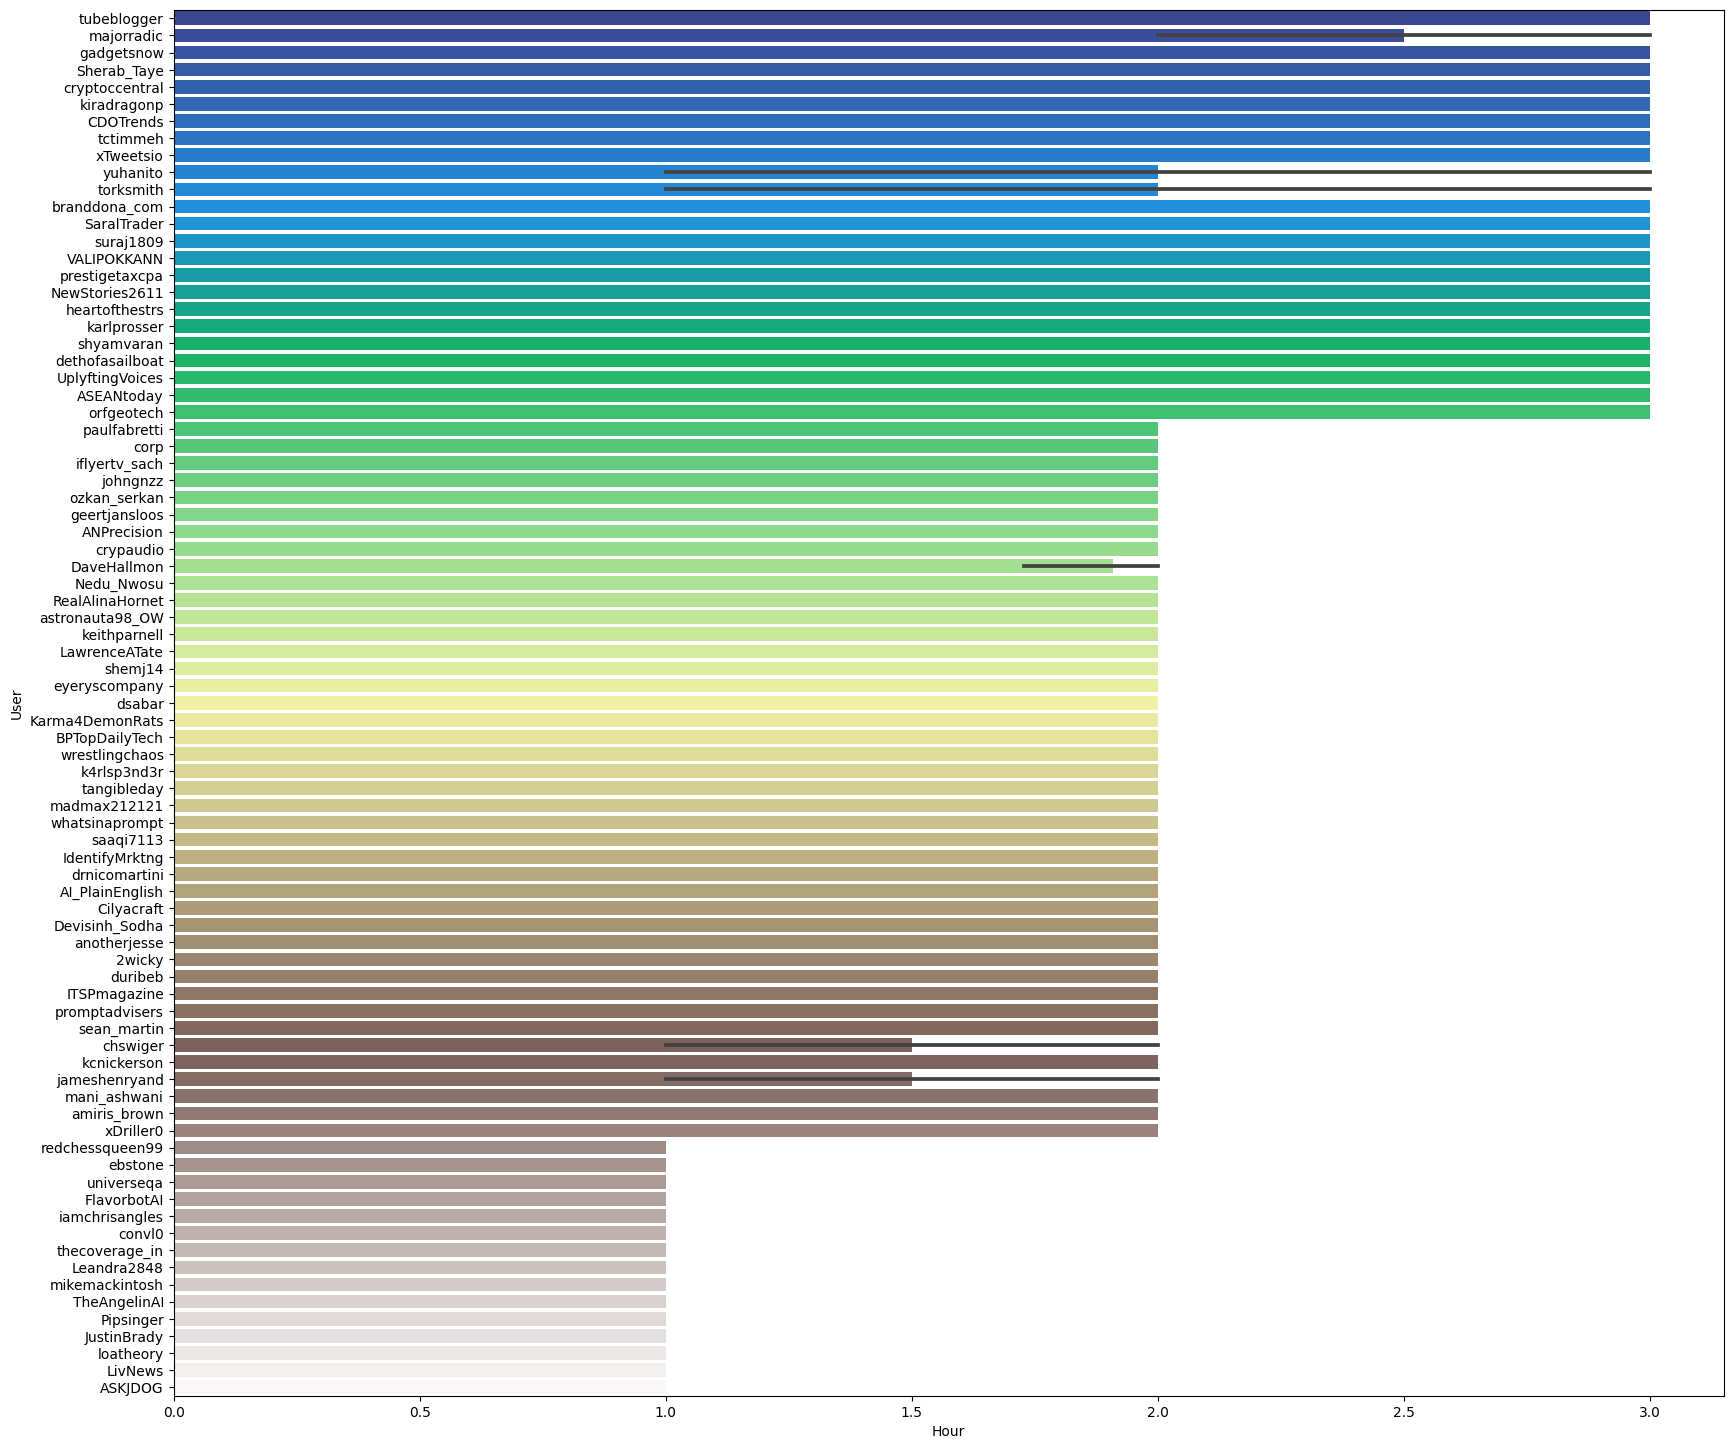

In [30]:
plt.figure(figsize=(20,18))
sns.barplot(df[: 100], y="User", x="Hour",palette="terrain")
plt.show()

In [31]:
df["Day"].value_counts()

Day
Tuesday      7145
Wednesday    7138
Thursday     7086
Friday       6752
Monday       3750
Saturday     3128
Sunday       2461
Name: count, dtype: int64

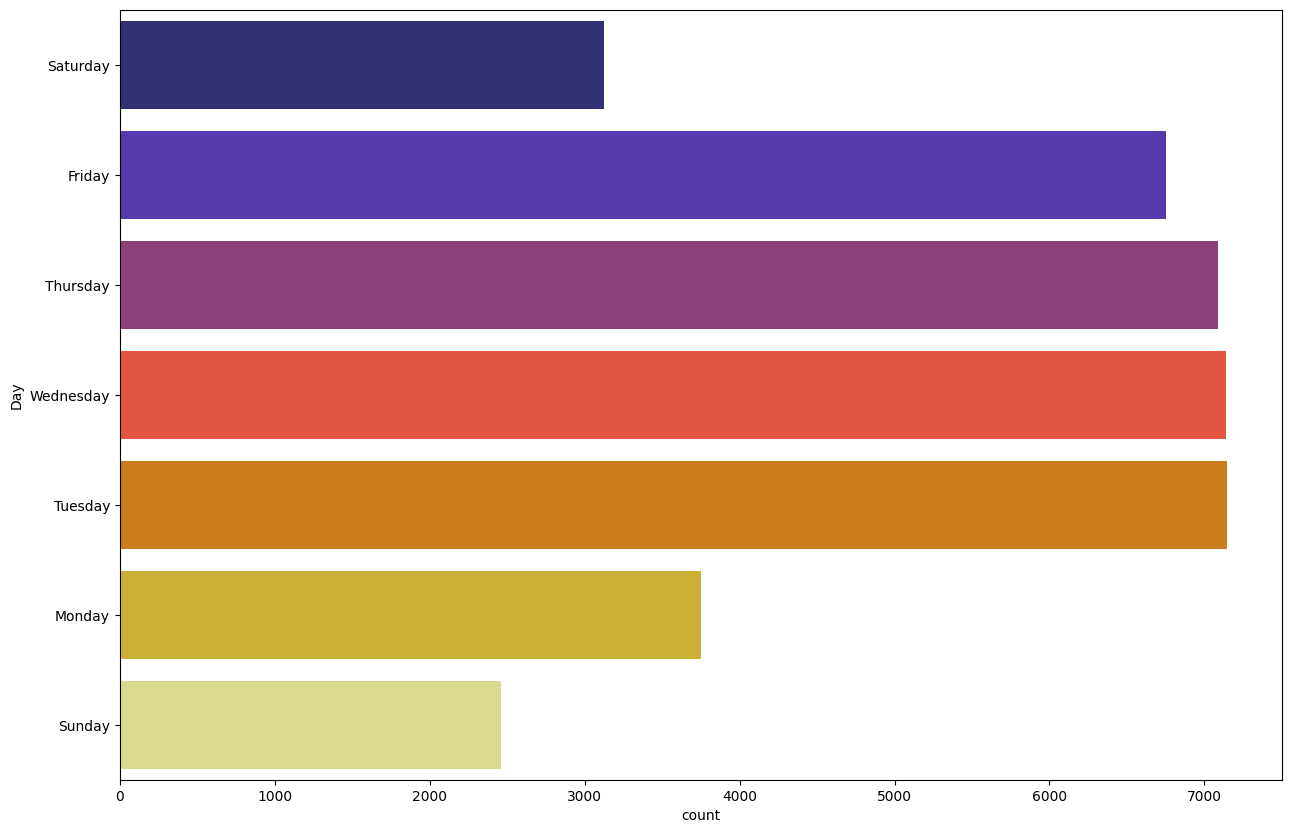

In [32]:
plt.figure(figsize=(15,10))
sns.countplot(y="Day",data=df,palette="CMRmap")
plt.show()

In [33]:

import emoji

def preprocess_word(word):
    word = re.sub(r'(.)\1+', r'\1\1', word)
    word = re.sub(r'(-|\')', '', word)
    return word

def is_valid_word(word):
    return (re.search(r'^[a-zA-Z][a-z0-9A-Z\._]*$', word) is not None)

def handle_emojis(tweet):
    emoji_patterns = {
        r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))': ' EMO_POS ',
        r'(:\s?D|:-D|x-?D|X-?D)': ' EMO_POS ',
        r'(<3|:\*)': ' EMO_POS ',
        r'(;-?\)|;-?D|\(-?;)|😉': ' EMO_POS ',
        r'(:\s?\(|:-\(|\)\s?:|\)-:)': ' EMO_NEG ',
        r'(:,\(|:\'\(|:"\()': ' EMO_NEG '
    }
    for pattern, replacement in emoji_patterns.items():
        tweet = re.sub(pattern, replacement, tweet)
    return tweet

def remove_emoji(tweet):
    return emoji.replace_emoji(tweet, replace=" ")

def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", tweet)
    tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', '', tweet)
    tweet = re.sub(r'@[\S]+', '', tweet)
    tweet = re.sub(r'#(\S+)', '', tweet)
    tweet = re.sub(r'\brt\b', '', tweet)
    tweet = re.sub(r'\.{2,}', ' ', tweet)
    tweet = tweet.strip(' "\'')
    tweet = remove_emoji(tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    processed_tweet = [preprocess_word(word) for word in tweet.split()]
    return ' '.join(processed_tweet)


In [34]:
df["clean_tweet"] = df["Tweet"].apply(preprocess_tweet)

# Model From Huggingface

##### https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest


In [35]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig, pipeline
MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"

tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

sa = pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

2024-08-04 08:13:44.295283: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 08:13:44.295396: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 08:13:44.449955: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly 

# Test Tweet Label & Score

In [36]:
print(df.loc[12229].Tweet)
print("\n")
print("============================================================")
print("\n")
test=sa(df.loc[12229].Tweet)
print(test)

O Chato GPT #desenho #drawing #draw #characters #humor #natureza #cartum #charge #vidaurbana #cidade #ilustração #desenho #robo #cerveja #beercast #robot #ia #ai #chatgpt #inteligenciaartificial https://t.co/EZWMR52u9g




[{'label': 'neutral', 'score': 0.8574587106704712}]


In [37]:
print(df.loc[12229].clean_tweet)
print("\n")
print("============================================================")
print("\n")
test=sa(df.loc[12229].clean_tweet)
print(test)

o chato gpt




[{'label': 'neutral', 'score': 0.7420278787612915}]


In [38]:
print(df.loc[18000].Tweet)
print("\n")
print("============================================================")
print("\n")
test=sa(df.loc[18000].Tweet)
print(test)

We can assure you that #AI won’t replace lawyers because regulators won’t let AI do all legal tasks without a qualified #lawyer to take responsibility.

#chatgpt #elawcareers https://t.co/cQ01hCWXci




[{'label': 'neutral', 'score': 0.6222677230834961}]


In [39]:
print(df.loc[18000].clean_tweet)
print("\n")
print("============================================================")
print("\n")
test=sa(df.loc[18000].clean_tweet)
print(test)

we can assure you that won’t replace lawyers because regulators won’t let ai do all legal tasks without a qualified to take responsibility.




[{'label': 'neutral', 'score': 0.525272011756897}]


In [40]:
# df["sentiment_label"] = "-"
# df["sentiment_score"] = -1

# df_part_1 = df[:10000]
# df_part_2 = df[10000:20000]
# df_part_3 = df[20000:30000]
# df_part_4 = df[30000:]

In [41]:
# from tqdm import tqdm

# tqdm.pandas()

# # Apply sentiment analysis to clean_tweet column for all parts of the DataFrame
# df_part_1["sentiment"] = df_part_1["clean_tweet"].progress_apply(lambda x: sa(x)[0]['label'])
# df_part_1["sentiment_score"] = df_part_1["clean_tweet"].progress_apply(lambda x: sa(x)[0]['score'])

# df_part_2["sentiment"] = df_part_2["clean_tweet"].progress_apply(lambda x: sa(x)[0]['label'])
# df_part_2["sentiment_score"] = df_part_2["clean_tweet"].progress_apply(lambda x: sa(x)[0]['score'])

# df_part_3["sentiment"] = df_part_3["clean_tweet"].progress_apply(lambda x: sa(x)[0]['label'])
# df_part_3["sentiment_score"] = df_part_3["clean_tweet"].progress_apply(lambda x: sa(x)[0]['score'])

# df_part_4["sentiment"] = df_part_4["clean_tweet"].progress_apply(lambda x: sa(x)[0]['label'])
# df_part_4["sentiment_score"] = df_part_4["clean_tweet"].progress_apply(lambda x: sa(x)[0]['score'])


In [42]:
# df_new = pd.concat([df_part_1, df_part_2, df_part_3, df_part_4], ignore_index=True)
# df_new.to_csv("tweet_gpt.csv", index=False)

In [43]:
df1=pd.read_csv("/kaggle/input/tweet-gpt/tweet_gpt.csv")

In [44]:
df1.columns

Index(['Date', 'Tweet', 'Url', 'User', 'UserCreated', 'UserVerified',
       'UserFollowers', 'UserFriends', 'Retweets', 'Likes', 'Location',
       'Description', 'New_Date', 'Time', 'Hour', 'Day', 'TweetStr',
       'hashtags', 'clean_tweet', 'sentiment_label', 'sentiment_score',
       'sentiment'],
      dtype='object')

In [45]:
df1.drop(columns=["Url","Tweet","User","UserCreated","sentiment_label"],axis=1,inplace=True)

In [46]:
df1["sentiment"].value_counts()

sentiment
neutral     19218
positive    11705
negative     6537
Name: count, dtype: int64

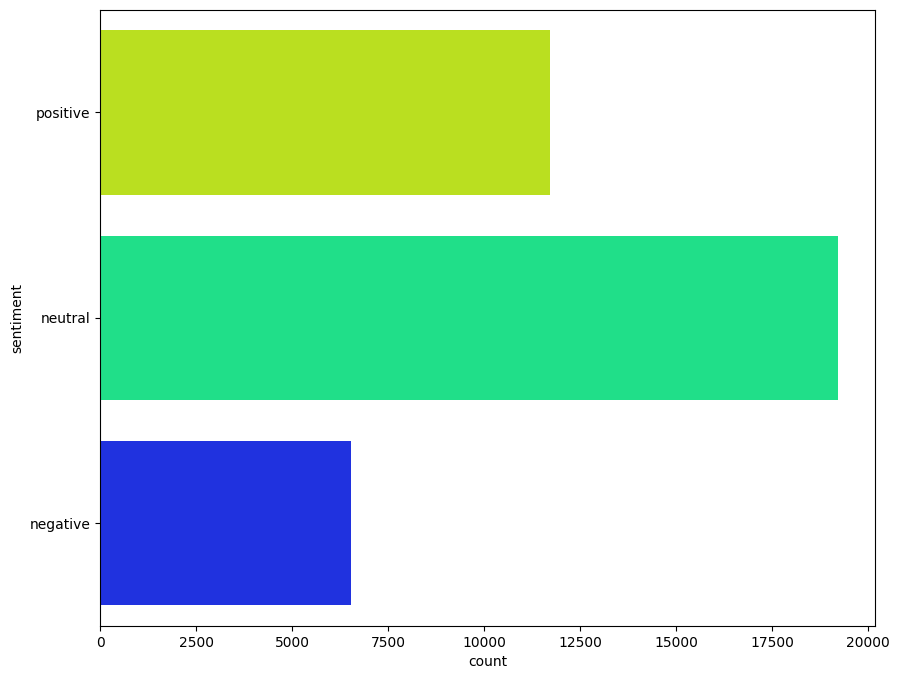

In [47]:
plt.figure(figsize=(10,8))
sns.countplot(y="sentiment",data=df1,palette="gist_rainbow")
plt.show()

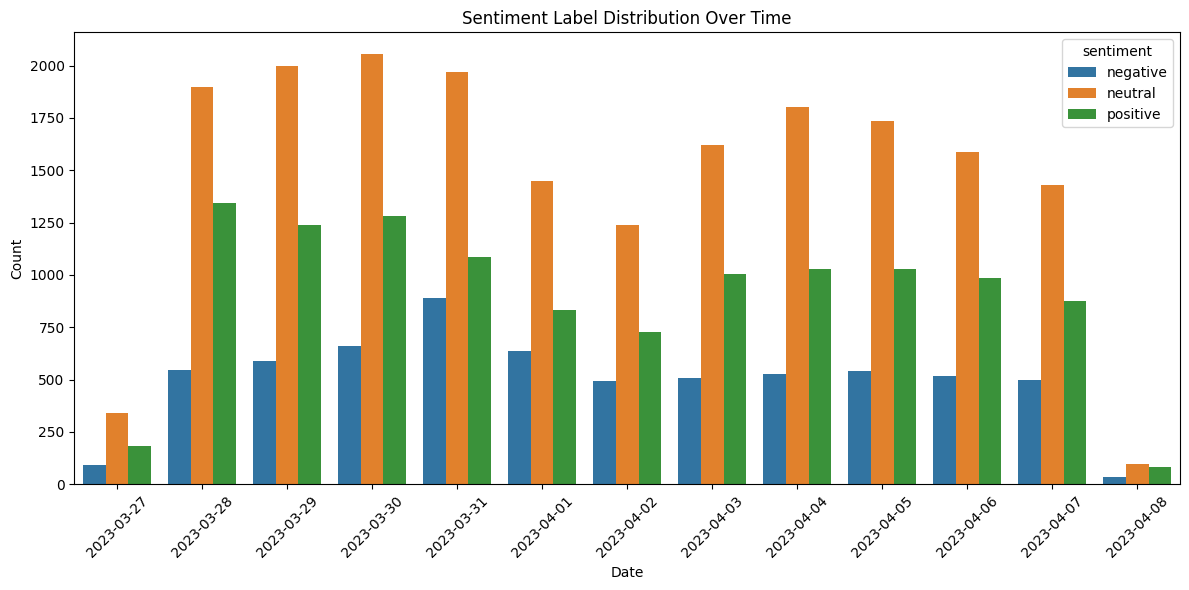

In [48]:

sentiment_counts = df1.groupby(['New_Date', 'sentiment']).size().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=sentiment_counts, x='New_Date', y='Count', hue='sentiment')
plt.title('Sentiment Label Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
df1.drop(columns=["Date","UserVerified","UserFollowers","UserFriends","Retweets","Likes","Location","New_Date"],axis=1,inplace=True)

In [50]:
df1.drop(columns=["Time","Hour","Day","TweetStr","hashtags","sentiment_score"],axis=1,inplace=True)

In [51]:
from bs4 import BeautifulSoup
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Remove special characters and digits
    text = re.sub(r"[^a-zA-Z]", " ", text)

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    
    # Convert to lowercase
    text = text.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
df1["clean_description"] = df["Description"].apply(clean_text)

/tmp/ipykernel_34/1709735225.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
/tmp/ipykernel_34/1709735225.py:11: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


In [53]:
df1.head()

Description  \
0  Exploring the Best Of The Web. Tech, Games, Ar...   
1  Mediji i milosrdje\n\n                        ...   
2  The official technology news website of The Ti...   
3  Musician // Thinker // Metaphysical Dandy // f...   
4  Get the latest updates and insights on the cry...   

                                         clean_tweet sentiment  \
0               openai’s gpt4 just got supercharged!  positive   
1  classical art" is struggling  not changed the ...   neutral   
2  alibaba invites businesses to trial chatgpt ri...   neutral   
3  trying to stop students from using and is like...  negative   
4  i asked chatgpts ai chatbot how can i earn cry...   neutral   

                                   clean_description  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3  exploring best web tech games art weirdtubes c...  
4      mediji milosrdje moralno preispitivanje sport

In [54]:
df1=df1[["clean_tweet","clean_description","sentiment"]]

In [55]:
df1.isnull().sum()

clean_tweet             1
clean_description    9474
sentiment               0
dtype: int64

In [56]:
df1['clean_description'].fillna(df1['clean_tweet'], inplace=True)

/tmp/ipykernel_34/652614557.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['clean_description'].fillna(df1['clean_tweet'], inplace=True)


In [57]:
df1['clean_tweet'].fillna(df1['clean_description'], inplace=True)

/tmp/ipykernel_34/2763964737.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['clean_tweet'].fillna(df1['clean_description'], inplace=True)


In [58]:
df1.head()

clean_tweet  \
0               openai’s gpt4 just got supercharged!   
1  classical art" is struggling  not changed the ...   
2  alibaba invites businesses to trial chatgpt ri...   
3  trying to stop students from using and is like...   
4  i asked chatgpts ai chatbot how can i earn cry...   

                                   clean_description sentiment  
0               openai’s gpt4 just got supercharged!  positive  
1  classical art" is struggling  not changed the ...   neutral  
2  alibaba invites businesses to trial chatgpt ri...   neutral  
3  exploring best web tech games art weirdtubes c...  negative  
4      mediji milosrdje moralno preispitivanje sport   neutral

In [59]:
df1.isnull().sum()

clean_tweet          0
clean_description    0
sentiment            0
dtype: int64

In [60]:
df1['text'] = df1['clean_tweet'] + ' ' + df1['clean_description']

In [61]:
df1.head()

clean_tweet  \
0               openai’s gpt4 just got supercharged!   
1  classical art" is struggling  not changed the ...   
2  alibaba invites businesses to trial chatgpt ri...   
3  trying to stop students from using and is like...   
4  i asked chatgpts ai chatbot how can i earn cry...   

                                   clean_description sentiment  \
0               openai’s gpt4 just got supercharged!  positive   
1  classical art" is struggling  not changed the ...   neutral   
2  alibaba invites businesses to trial chatgpt ri...   neutral   
3  exploring best web tech games art weirdtubes c...  negative   
4      mediji milosrdje moralno preispitivanje sport   neutral   

                                                text  
0  openai’s gpt4 just got supercharged! openai’s ...  
1  classical art" is struggling  not changed the ...  
2  alibaba invites businesses to trial chatgpt ri...  
3  trying to stop students from using and is like...  
4  i asked chatgpts ai chatbot how can i earn cry...

In [62]:
df1.drop(columns=["clean_tweet","clean_description"],axis=1,inplace=True)


In [63]:
df1.rename(columns={'sentiment': 'label'}, inplace=True)

In [64]:
df1=df1[["text","label"]]

In [65]:
df1.head()

text     label
0  openai’s gpt4 just got supercharged! openai’s ...  positive
1  classical art" is struggling  not changed the ...   neutral
2  alibaba invites businesses to trial chatgpt ri...   neutral
3  trying to stop students from using and is like...  negative
4  i asked chatgpts ai chatbot how can i earn cry...   neutral

In [66]:
df1.shape

(37460, 2)

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37460 entries, 0 to 37459
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    37460 non-null  object
 1   label   37460 non-null  object
dtypes: object(2)
memory usage: 585.4+ KB


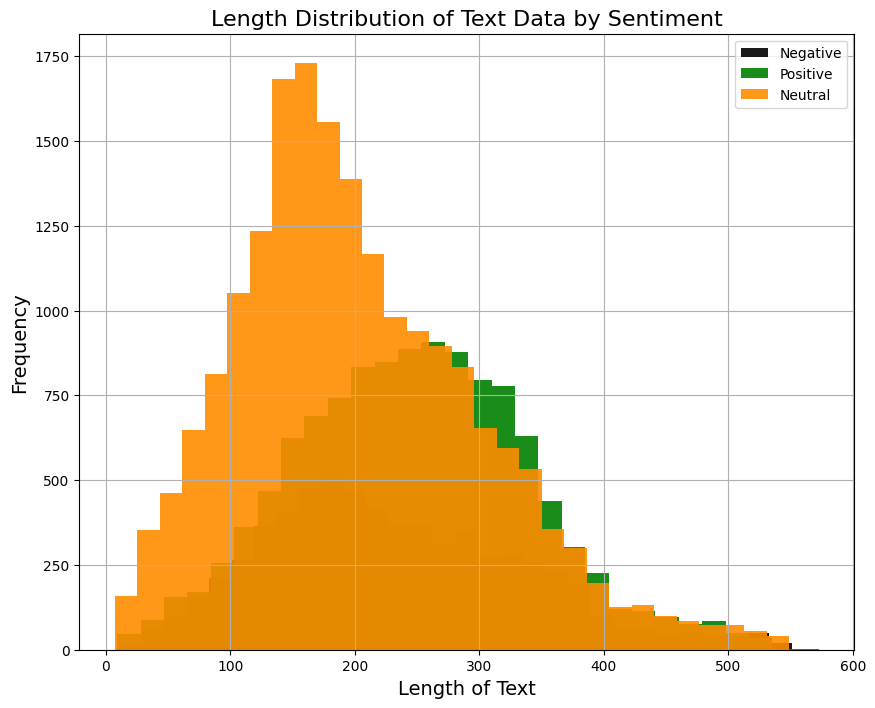

In [68]:
negative_len=df1[df1["label"]=="negative"]["text"].str.len()
positive_len=df1[df1["label"]=="positive"]["text"].str.len()
neutral_len=df1[df1["label"]=="neutral"]["text"].str.len()
plt.figure(figsize=(10, 8))
plt.hist(negative_len, bins=30, label='Negative', color="black",alpha=0.9)
plt.hist(positive_len, bins=30, label='Positive', color="green",alpha=0.9)
plt.hist(neutral_len, bins=30, label='Neutral', color="darkorange",alpha=0.9)
plt.title("Length Distribution of Text Data by Sentiment", fontsize=16)
plt.xlabel("Length of Text", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Positive data wordcloud

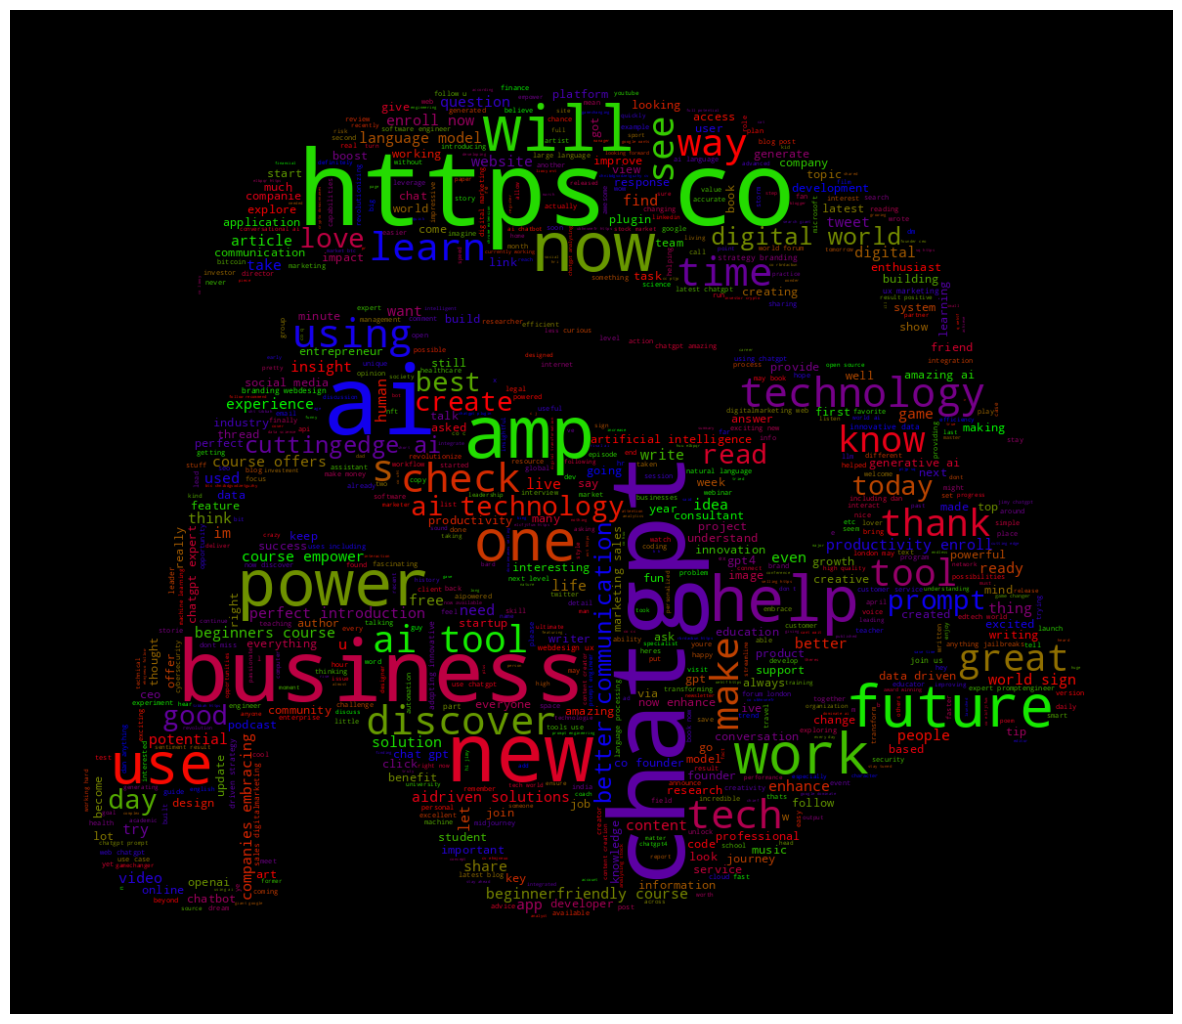

In [69]:
plt.figure(figsize=(15,15))
positive_wordcloud=df1[df1["label"]=="positive"]
positive_text=" ".join(positive_wordcloud['text'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="brg",mask=mask).generate(positive_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Negative data wordcloud

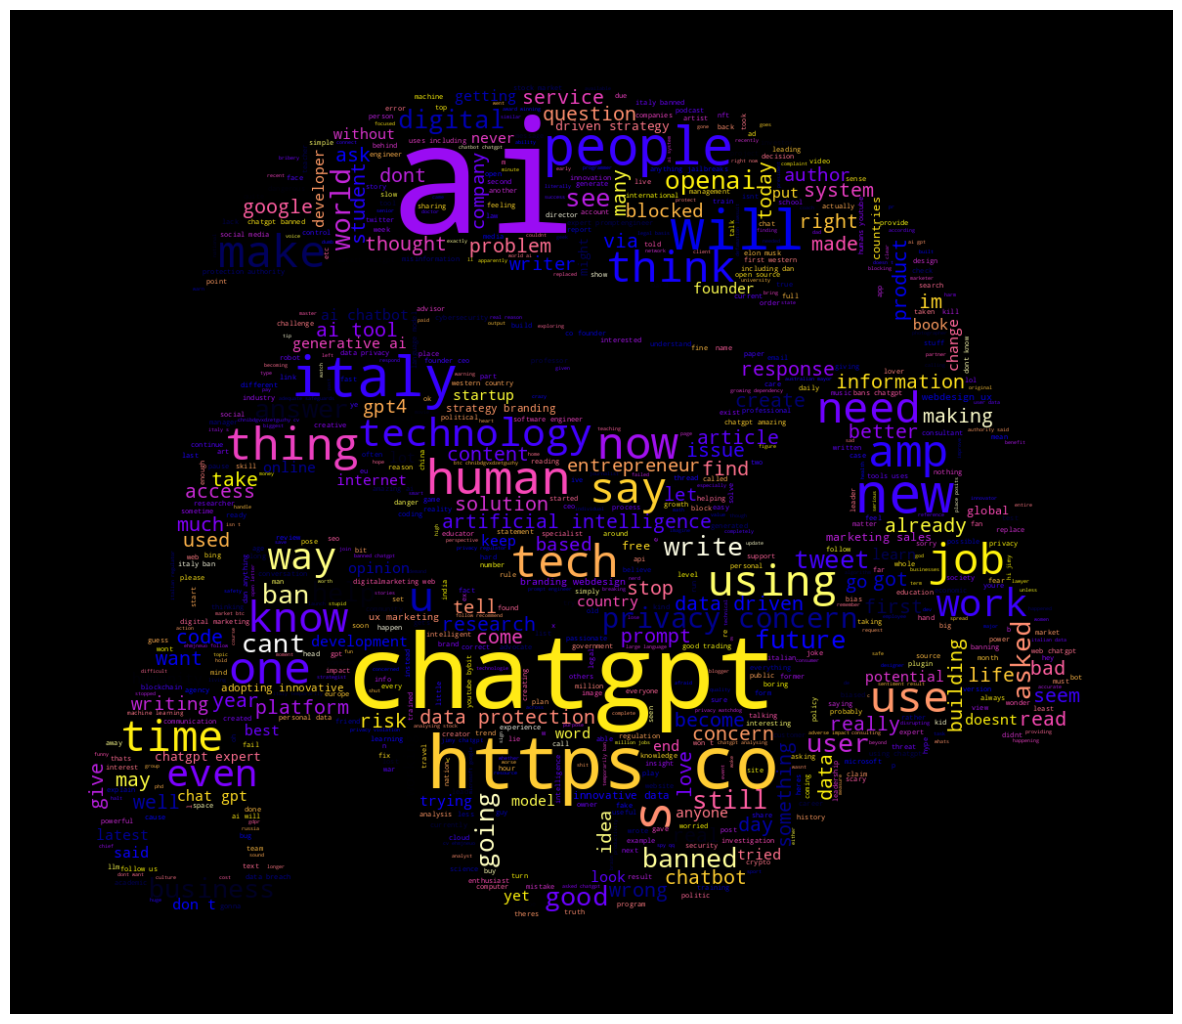

In [70]:
plt.figure(figsize=(15,15))
negative_wordcloud=df1[df1["label"]=="negative"]
negative_text=" ".join(negative_wordcloud['text'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="gnuplot2",mask=mask).generate(negative_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Neutral Data wordcloud

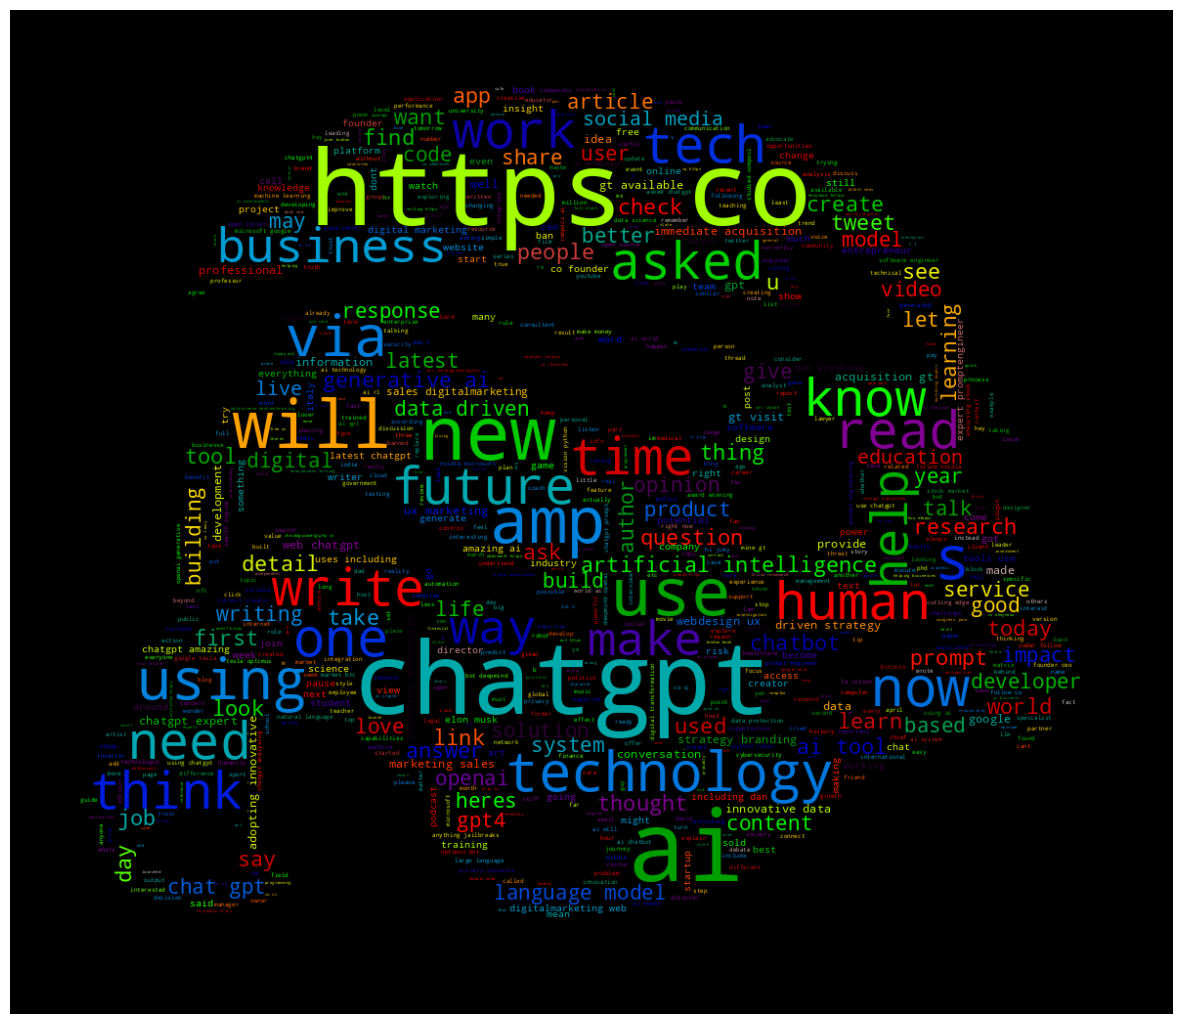

In [71]:
plt.figure(figsize=(15,15))
neutral_wordcloud=df1[df1["label"]=="neutral"]
neutral_text=" ".join(neutral_wordcloud['text'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='black', max_words=800,colormap="nipy_spectral",mask=mask).generate(neutral_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 40 Most common Words From Positive text

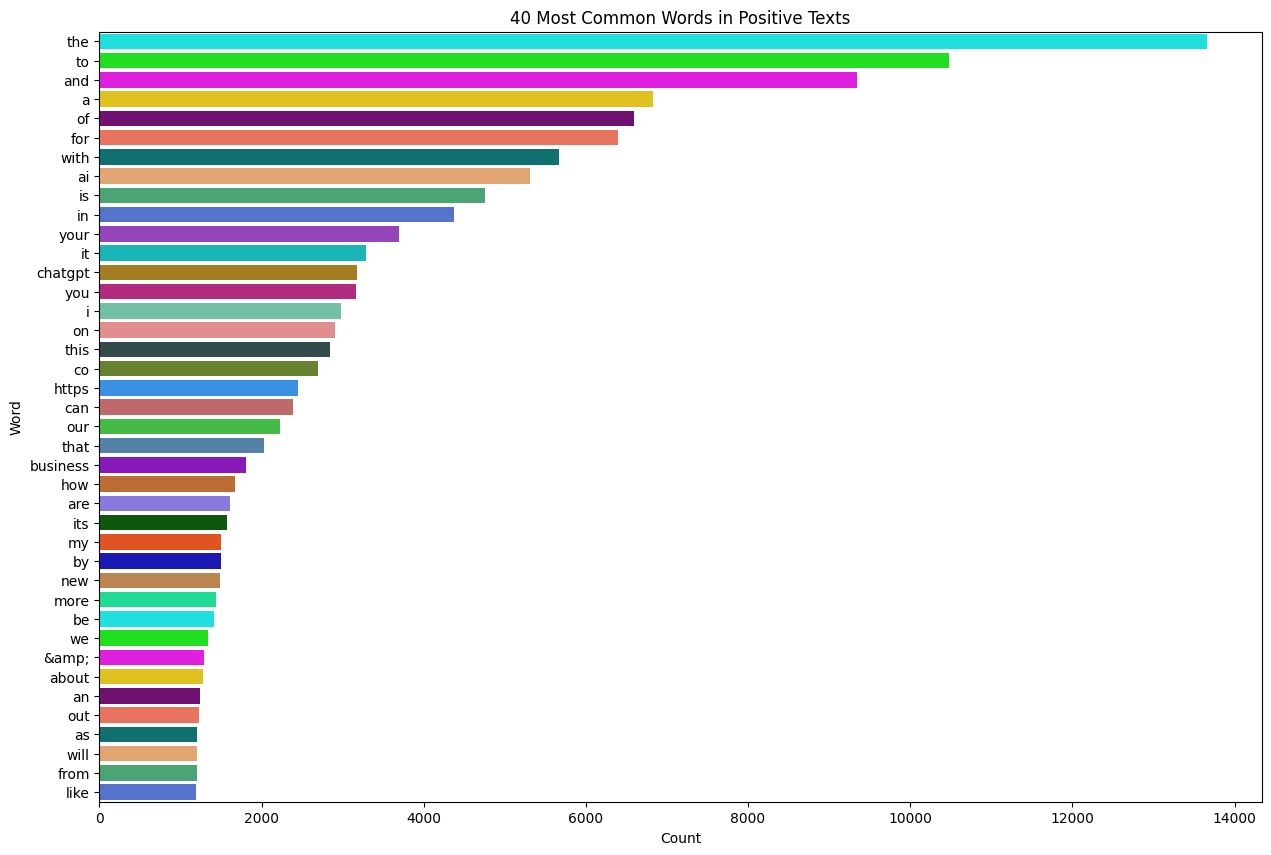

In [72]:


positive_text = df1[df1["label"] == "positive"]
data_set = positive_text["text"].str.split()
all_words = [word for sublist in data_set for word in sublist]
counter = Counter(all_words)
common_words = counter.most_common(40)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

colors = ["cyan", "lime", "magenta", "gold", "purple", "tomato", "teal", "sandybrown", "mediumseagreen",
          "royalblue", "darkorchid", "darkturquoise", "darkgoldenrod", "mediumvioletred", "mediumaquamarine",
          "lightcoral", "darkslategray", "olivedrab", "dodgerblue", "indianred", "limegreen", "steelblue",
          "darkviolet", "chocolate", "mediumslateblue", "darkgreen", "orangered", "mediumblue", "peru", "mediumspringgreen"]

plt.figure(figsize=(15,10))
sns.barplot(x='Count', y='Word', data=df_common_words, palette=colors)
plt.title('40 Most Common Words in Positive Texts')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()


# 40 Most common Words From Negative text

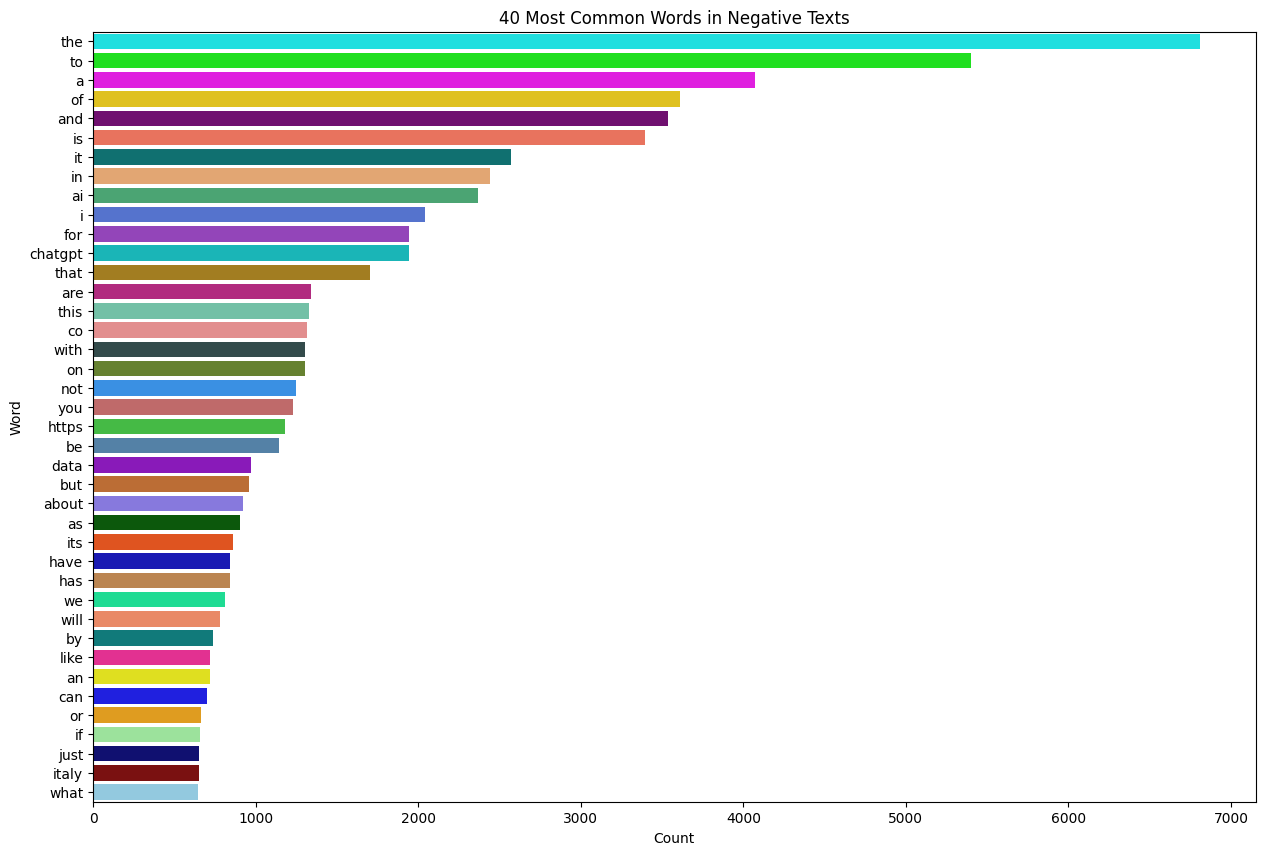

In [73]:
negative_text = df1[df1["label"] == "negative"]
data_set = negative_text["text"].str.split()
all_words = [word for sublist in data_set for word in sublist]
counter = Counter(all_words)
common_words = counter.most_common(40)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

colors = ["cyan", "lime", "magenta", "gold", "purple", "tomato", "teal", "sandybrown", "mediumseagreen",
          "royalblue", "darkorchid", "darkturquoise", "darkgoldenrod", "mediumvioletred", "mediumaquamarine",
          "lightcoral", "darkslategray", "olivedrab", "dodgerblue", "indianred", "limegreen", "steelblue",
          "darkviolet", "chocolate", "mediumslateblue", "darkgreen", "orangered", "mediumblue", "peru", "mediumspringgreen",
          "coral", "darkcyan", "deeppink", "yellow", "blue", "orange", "lightgreen", "navy", "darkred", "skyblue",
          "lime", "orchid", "silver", "gold"]

plt.figure(figsize=(15,10))
sns.barplot(x='Count', y='Word', data=df_common_words, palette=colors)
plt.title('40 Most Common Words in Negative Texts')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# 40 Most common Words From Neutral text

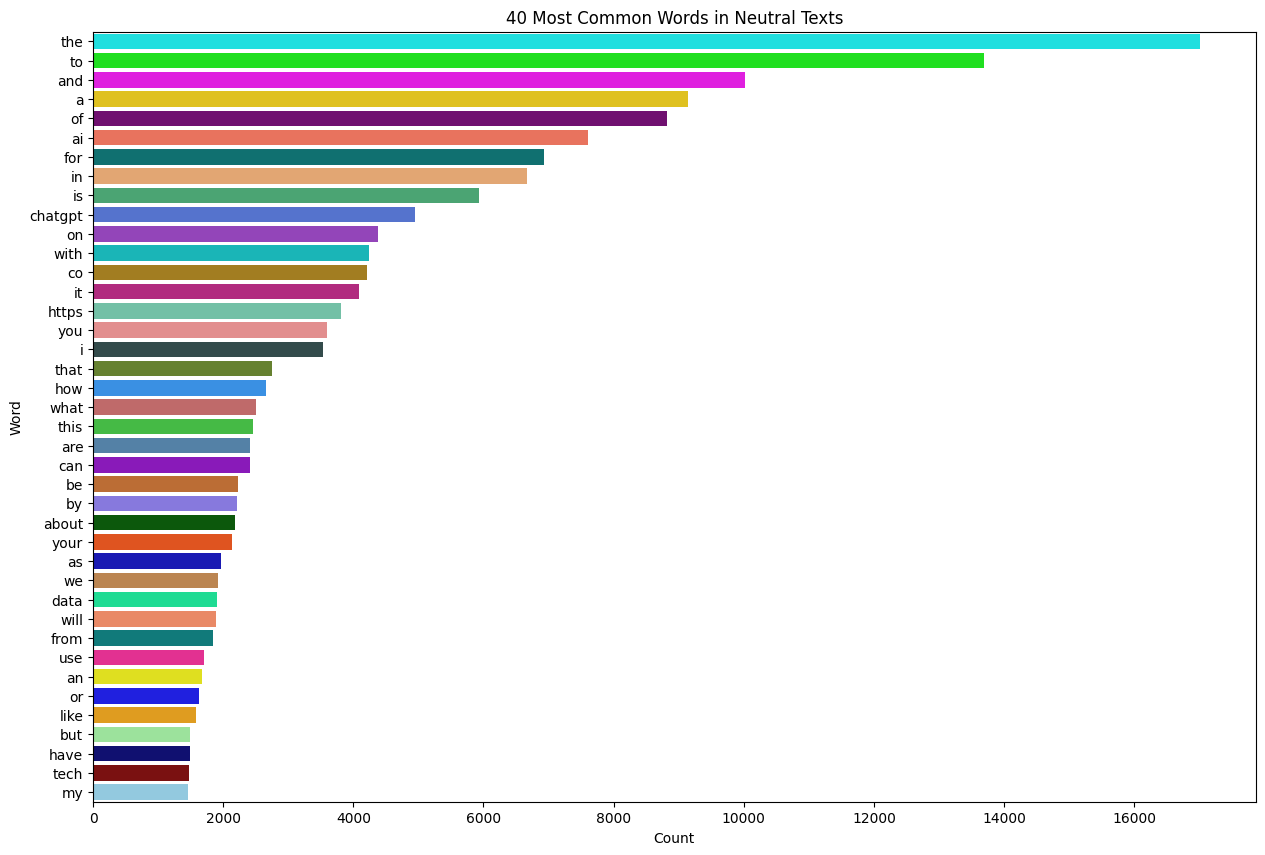

In [74]:
neutral_text = df1[df1["label"] == "neutral"]
data_set = neutral_text["text"].str.split()
all_words = [word for sublist in data_set for word in sublist]
counter = Counter(all_words)
common_words = counter.most_common(40)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

colors = ["cyan", "lime", "magenta", "gold", "purple", "tomato", "teal", "sandybrown", "mediumseagreen",
          "royalblue", "darkorchid", "darkturquoise", "darkgoldenrod", "mediumvioletred", "mediumaquamarine",
          "lightcoral", "darkslategray", "olivedrab", "dodgerblue", "indianred", "limegreen", "steelblue",
          "darkviolet", "chocolate", "mediumslateblue", "darkgreen", "orangered", "mediumblue", "peru", "mediumspringgreen",
          "coral", "darkcyan", "deeppink", "yellow", "blue", "orange", "lightgreen", "navy", "darkred", "skyblue",
          "lime", "orchid", "silver", "gold"]

plt.figure(figsize=(15,10))
sns.barplot(x='Count', y='Word', data=df_common_words, palette=colors)
plt.title('40 Most Common Words in Neutral Texts')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

# Topic Modeling

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df1['text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

topic_names = ["Technology", "Business", "Language Processing", "Privacy and Security", "Technical Details"]
print("Top words for each topic:")
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    print(f"Topic {topic_idx + 1} ({topic_names[topic_idx]}): {', '.join(top_words)}")


Top words for each topic:
Topic 1 (Technology): ai, amp, chatgpt, https, help, tech, using, new, people, work
Topic 2 (Business): chatgpt, ai, marketing, business, tools, digital, data, technology, world, web
Topic 3 (Language Processing): ai, chatgpt, like, world, prompt, language, just, asked, intelligence, time
Topic 4 (Privacy and Security): https, ai, data, italy, privacy, chatgpt, news, business, concerns, openai
Topic 5 (Technical Details): gt, link, chatgpt, tech, https, use, details, ai, visit, available


In [76]:
df1['number_character']=df1['text'].apply(len)
df1['number_of_words'] = df1['text'].apply(lambda x: len(x.split()))
df1['number_sentence'] = df1['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

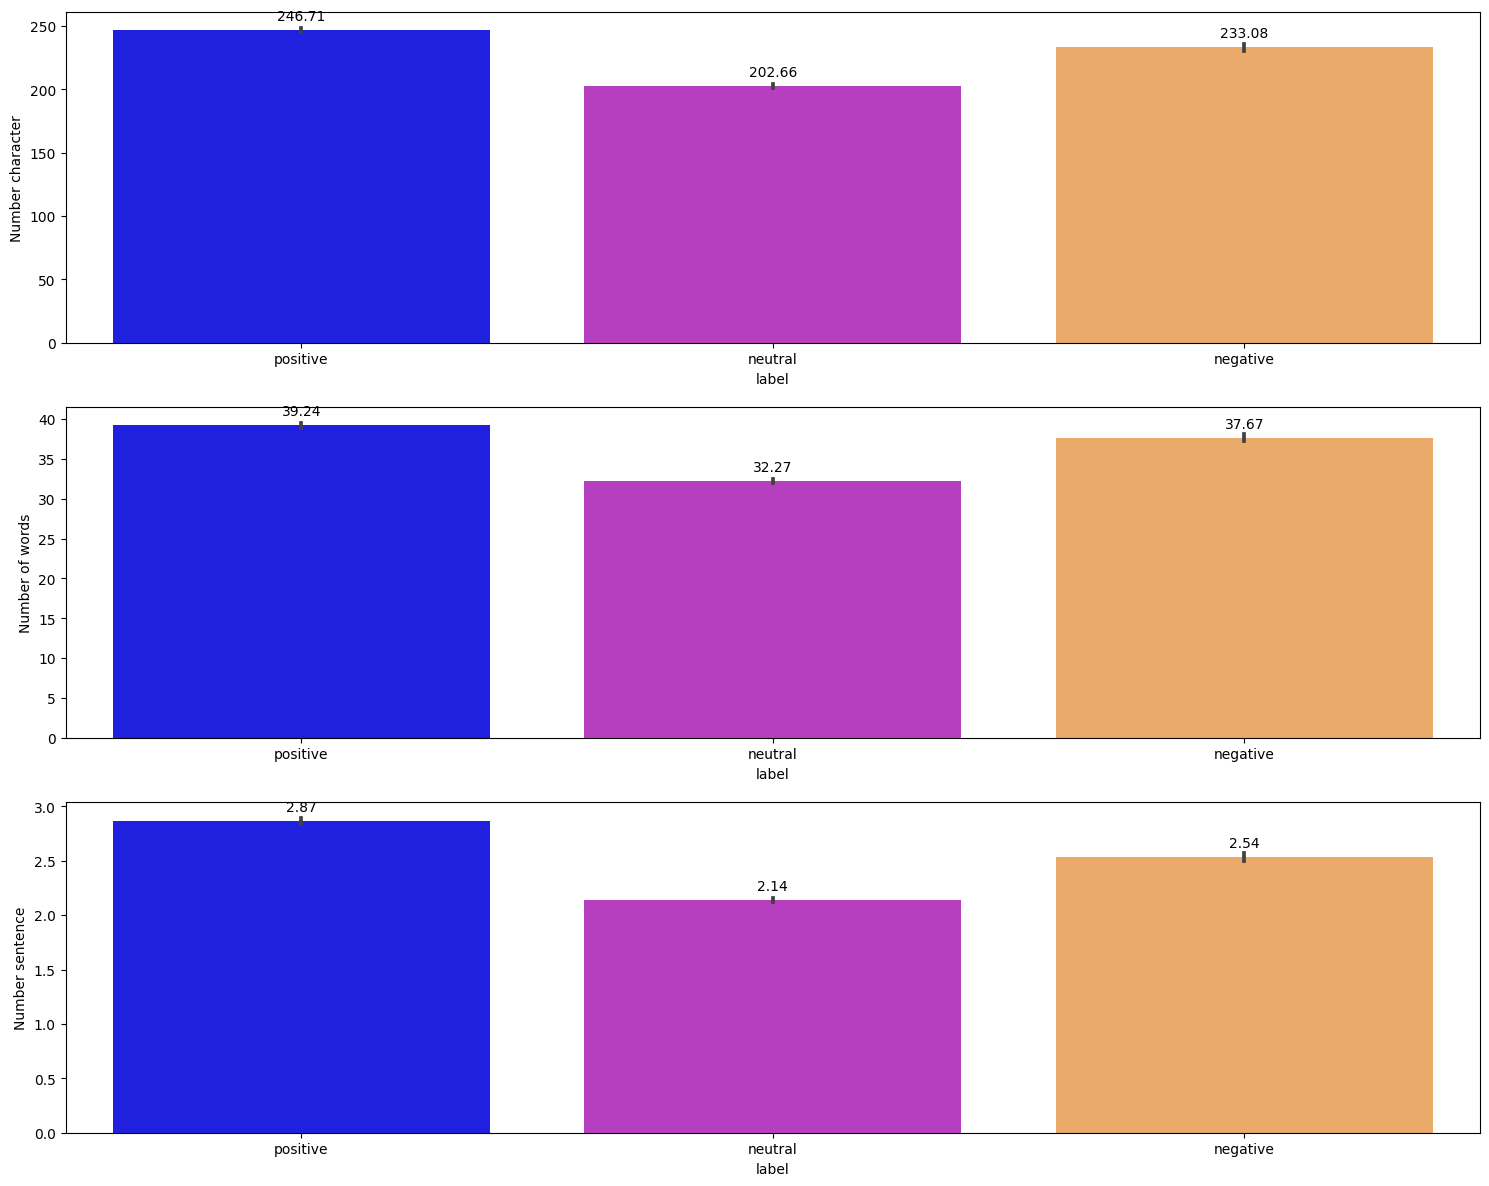

In [77]:

plt.figure(figsize=(15,12))

columns_to_plot = ['number_character', 'number_of_words', 'number_sentence']

for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(3, 1, i)
    ax = sns.barplot(data=df1, x='label', y=column,palette="gnuplot2")
    plt.ylabel(f'{column.replace("_", " ").capitalize()}')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

plt.tight_layout()
plt.show()


# Average Sentence Length

In [78]:
avg_len=df1["text"].apply(len)
avg_len=avg_len.mean()
print(f"Average Text Length is : {avg_len:.2f}")

Average Text Length is : 221.73


In [79]:
df1.drop(columns=["number_character","number_of_words","number_sentence"],axis=1,inplace=True)

In [80]:
df1["label"]=df1["label"].replace({"positive":0,"neutral":1,"negative":2})

/tmp/ipykernel_34/2065424062.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1["label"]=df1["label"].replace({"positive":0,"neutral":1,"negative":2})


In [81]:
label_name=["Positive","Neutral","Negative"]

In [82]:
df1.head()

text  label
0  openai’s gpt4 just got supercharged! openai’s ...      0
1  classical art" is struggling  not changed the ...      1
2  alibaba invites businesses to trial chatgpt ri...      1
3  trying to stop students from using and is like...      2
4  i asked chatgpts ai chatbot how can i earn cry...      1

In [83]:
df1.shape

(37460, 2)

In [84]:
vocab_size=30000
max_len=200

In [85]:
from tensorflow.keras.preprocessing.text import one_hot
texts = df1['text']
one_hot_texts = [one_hot(text,vocab_size) for text in texts]
df1['text'] = one_hot_texts


In [86]:
df1.head()

text  label
0  [17938, 28515, 23139, 29673, 9473, 17938, 2851...      0
1  [27980, 21069, 23588, 16033, 2742, 12471, 2746...      1
2  [12702, 25466, 6541, 15189, 7067, 16205, 24079...      1
3  [11407, 15189, 27714, 5797, 25951, 9998, 19950...      2
4  [567, 29957, 8956, 7986, 23894, 6317, 7804, 56...      1

In [87]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
my_onehot_data=df1["text"]
embedded_doc=pad_sequences(my_onehot_data,padding='pre',maxlen=max_len)
embedded_doc

array([[    0,     0,     0, ..., 23139, 29673,  9473],
       [    0,     0,     0, ...,   769,  2476, 24611],
       [    0,     0,     0, ...,  7986, 23894,  7923],
       ...,
       [    0,     0,     0, ..., 28519,  7285, 27211],
       [    0,     0,     0, ..., 20039, 15852, 10511],
       [    0,     0,     0, ..., 11548, 28784, 13348]], dtype=int32)

In [88]:
text_data=np.array(embedded_doc)
y=df1["label"]
label_data=np.array(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_data,label_data, test_size=0.2, random_state=42)


In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense, BatchNormalization,GRU
from tensorflow.keras.optimizers import Adam

embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim,input_shape=(max_len,)))
model.add(GRU(units=512, activation="tanh", return_sequences=True))
model.add(Dropout(0.5))
model.add(GRU(units=256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=256))
model.add(Dense(units=3, activation='softmax'))

learning_rate = 0.0001 
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 100)       │     3,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 200, 512)       │       943,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 256)            │       591,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,601,027 (17.55 MB)

 Trainable params: 4,601,027 (17.55 MB)

 Non-trainable params: 0 (0.00 B)

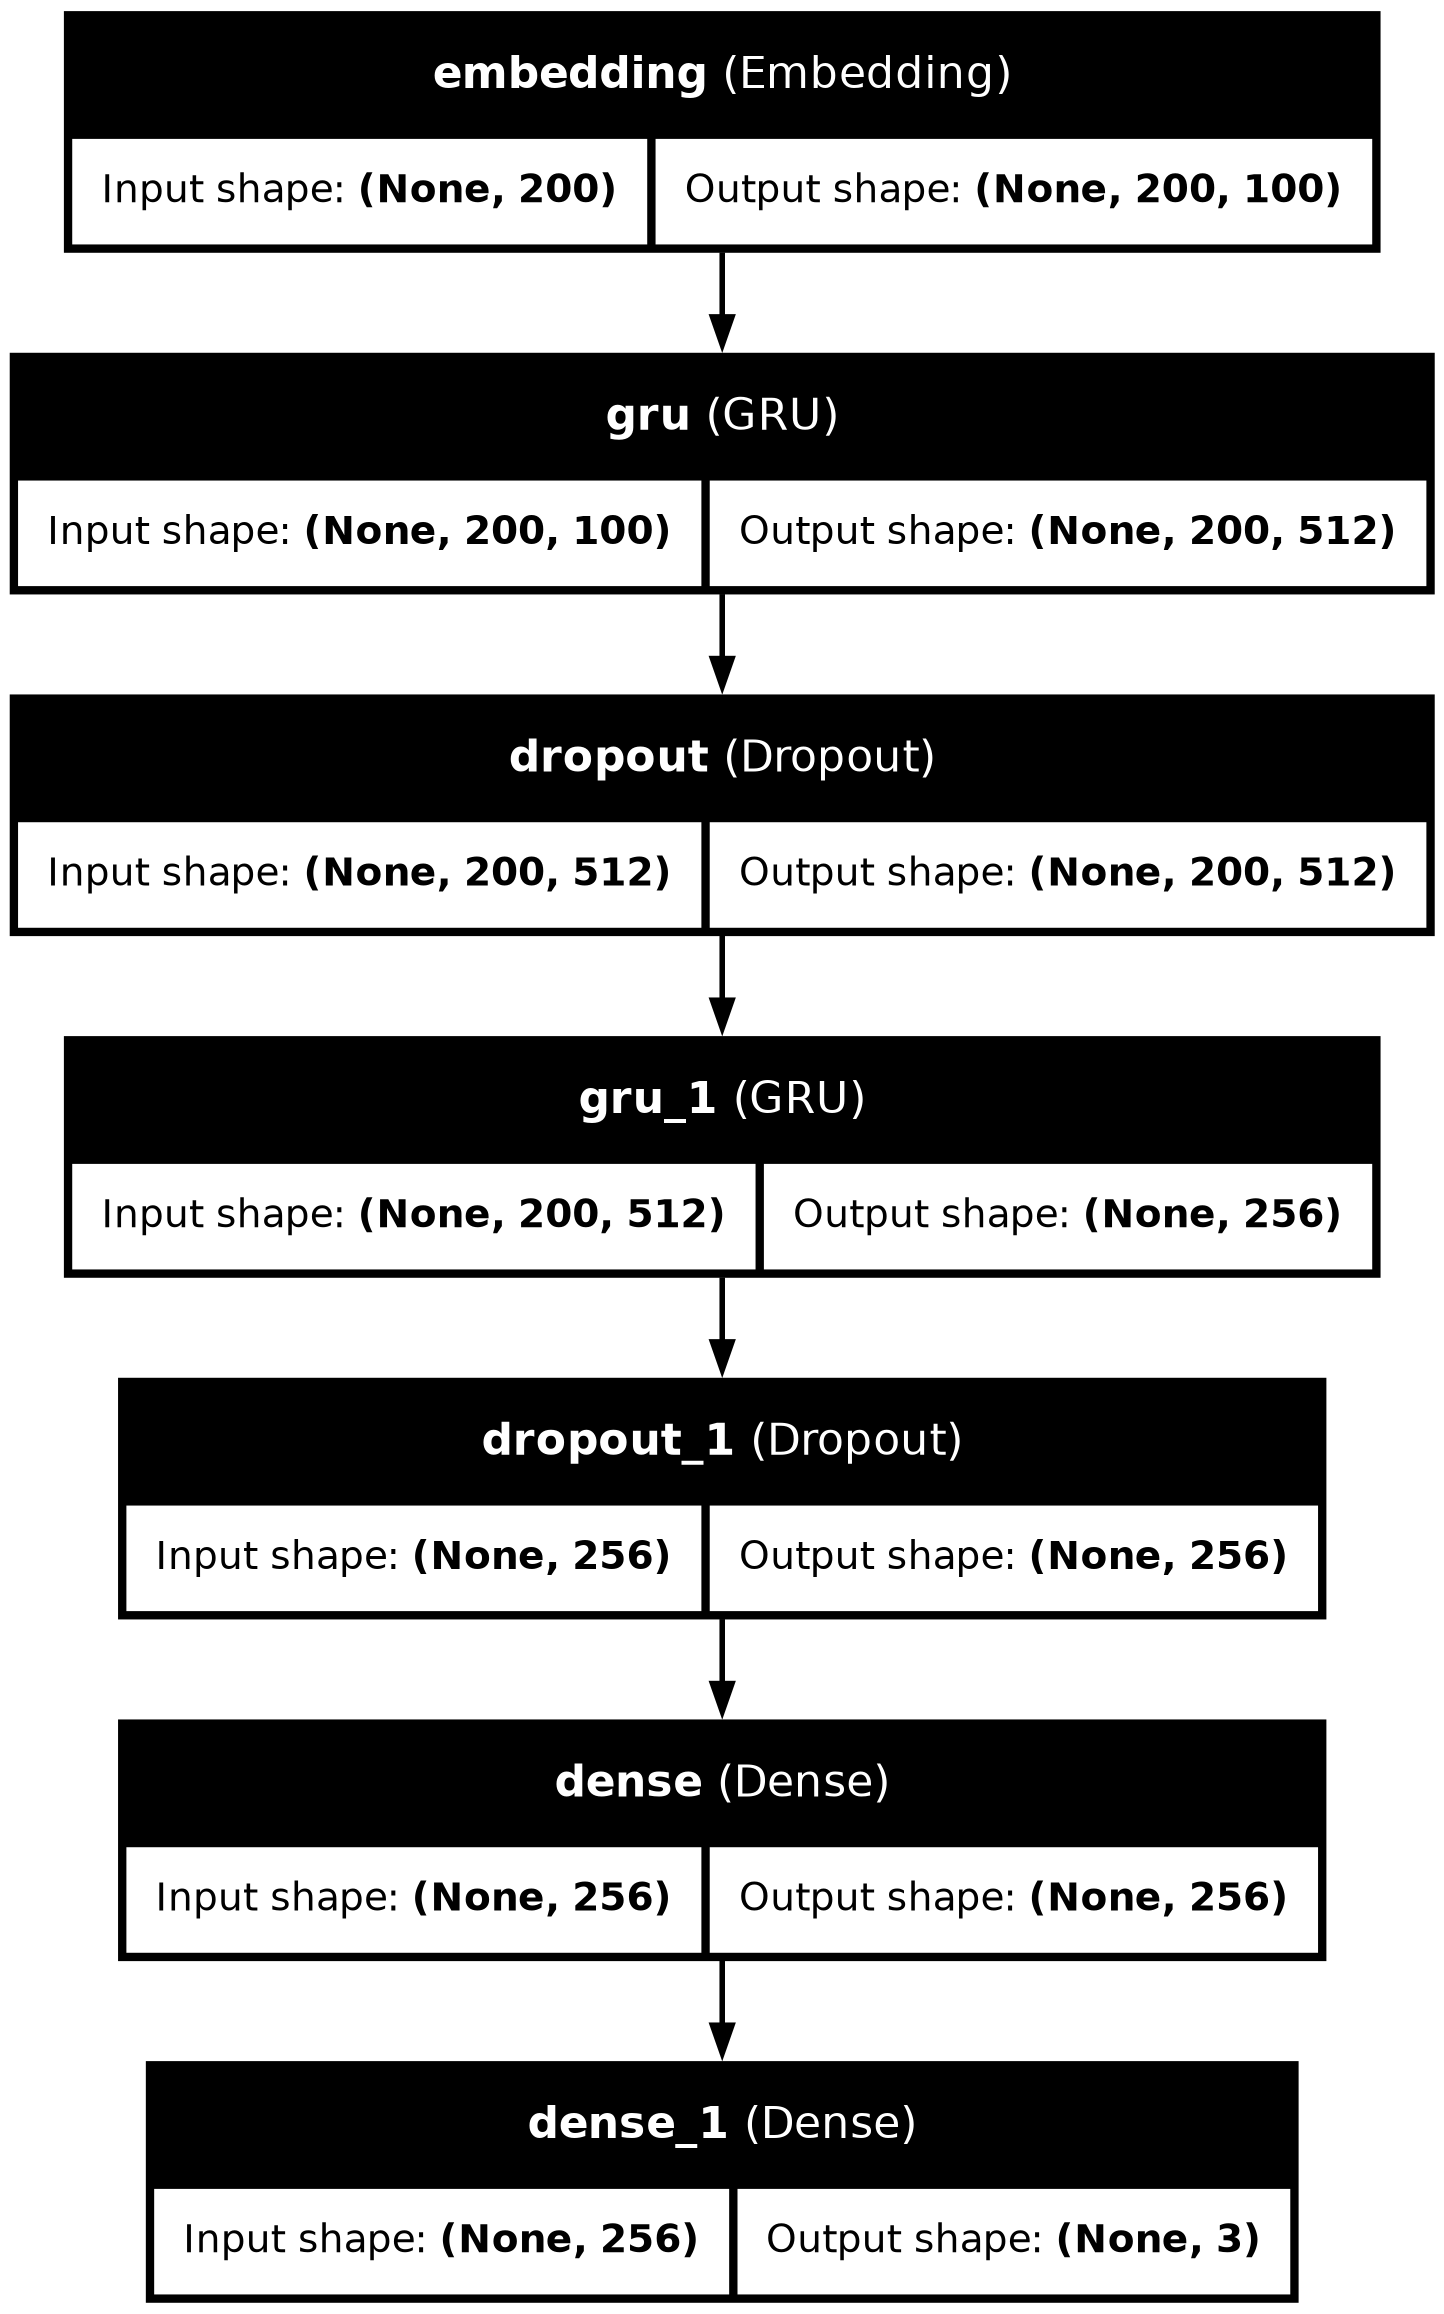

In [90]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [91]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)


In [92]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=40, batch_size=16, callbacks=[early_stopping, reduce_lr])

Epoch 1/40
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 439s 232ms/step - accuracy: 0.5246 - loss: 0.9971 - val_accuracy: 0.6137 - val_loss: 0.8954 - learning_rate: 1.0000e-04
Epoch 2/40
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 436s 233ms/step - accuracy: 0.6666 - loss: 0.7830 - val_accuracy: 0.6849 - val_loss: 0.7147 - learning_rate: 1.0000e-04
Epoch 3/40
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 435s 232ms/step - accuracy: 0.7856 - loss: 0.5333 - val_accuracy: 0.6913 - val_loss: 0.7522 - learning_rate: 1.0000e-04
Epoch 4/40
1873/1873 ━━━━━━━━━━━━━━━━━━━━ 435s 232ms/step - accuracy: 0.8400 - loss: 0.4096 - val_accuracy: 0.6995 - val_loss: 0.7919 - learning_rate: 1.0000e-04


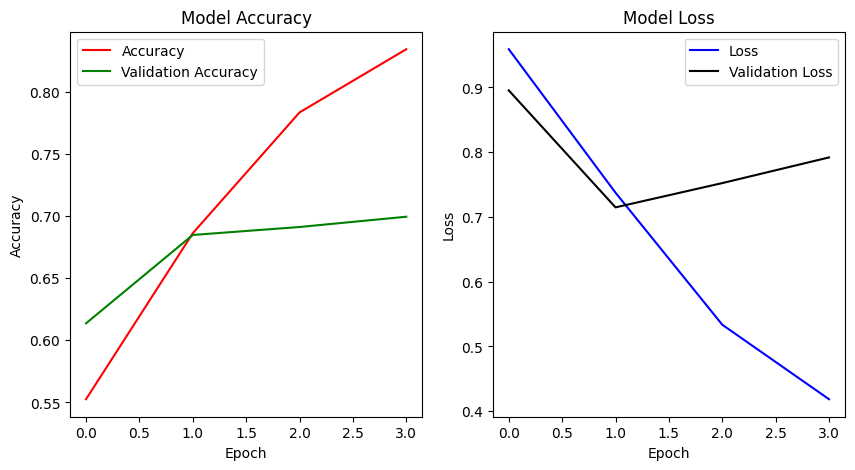

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

# First subplot
ax[0].plot(history.history['accuracy'],label="Accuracy",color="red")
ax[0].plot(history.history['val_accuracy'],label="Validation Accuracy",color="green")
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='best')

# Second subplot
ax[1].plot(history.history['loss'],label="Loss",color="blue")
ax[1].plot(history.history['val_loss'],label="Validation Loss",color="black")
ax[1].set_title('Model Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(loc='best')

plt.show()


In [94]:
pred=model.predict(X_test)
final_pred=np.argmax(pred,axis=1)

235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step


In [95]:
from sklearn.metrics import roc_curve, classification_report, confusion_matrix

In [96]:
print(classification_report(y_test,final_pred,target_names=label_name))

              precision    recall  f1-score   support

    Positive       0.70      0.73      0.71      2401
     Neutral       0.71      0.75      0.73      3798
    Negative       0.54      0.40      0.46      1293

    accuracy                           0.68      7492
   macro avg       0.65      0.63      0.64      7492
weighted avg       0.68      0.68      0.68      7492



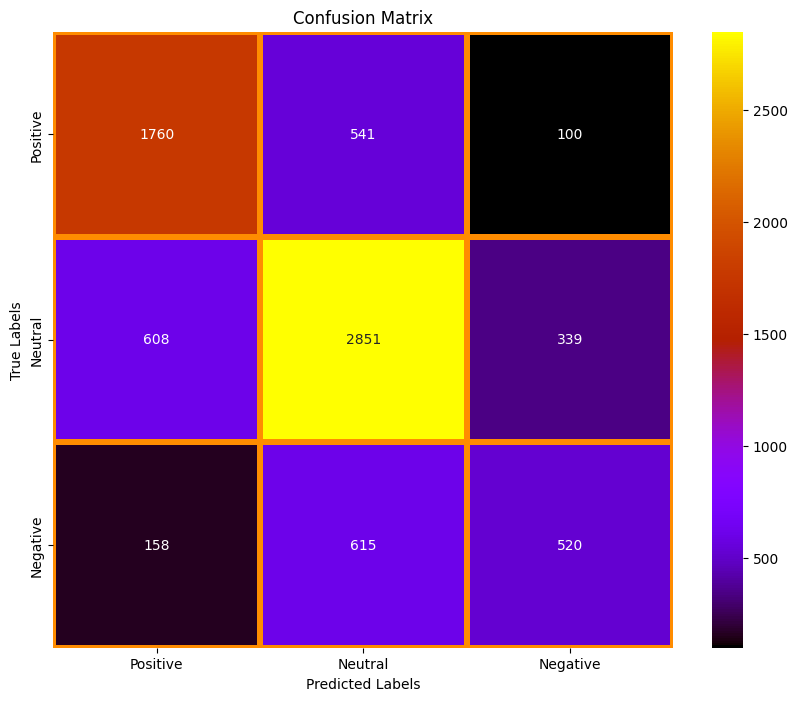

In [97]:
cf=confusion_matrix(y_test,final_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cf,annot=True,cmap="gnuplot",fmt="d",xticklabels=label_name,yticklabels=label_name,lw=4,linecolor="darkorange")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step


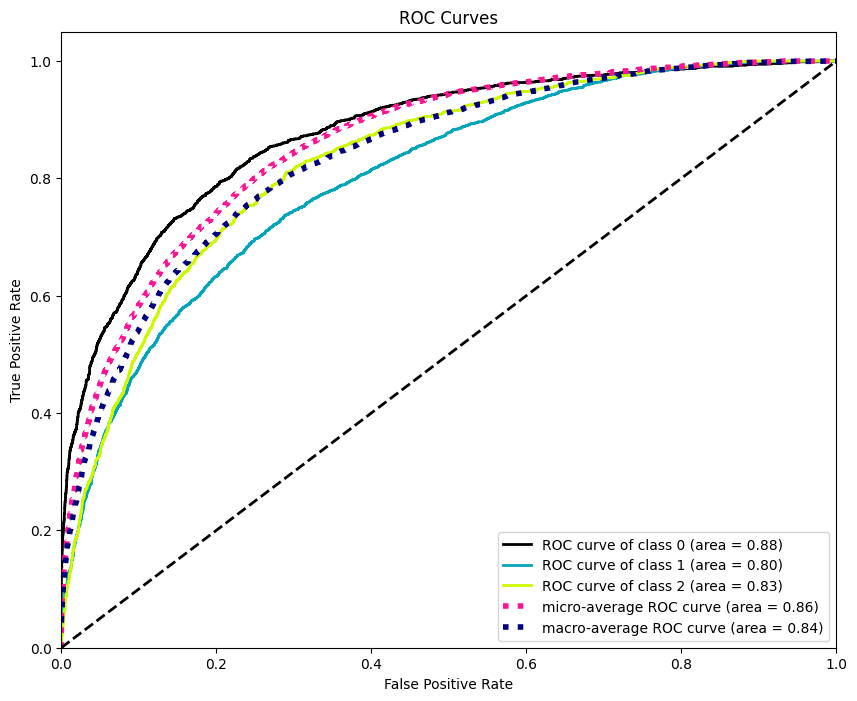

In [98]:
import scikitplot as skplt
y_probas = model.predict(X_test)
skplt.metrics.plot_roc(y_test, y_probas,figsize=(10,8))
plt.show()

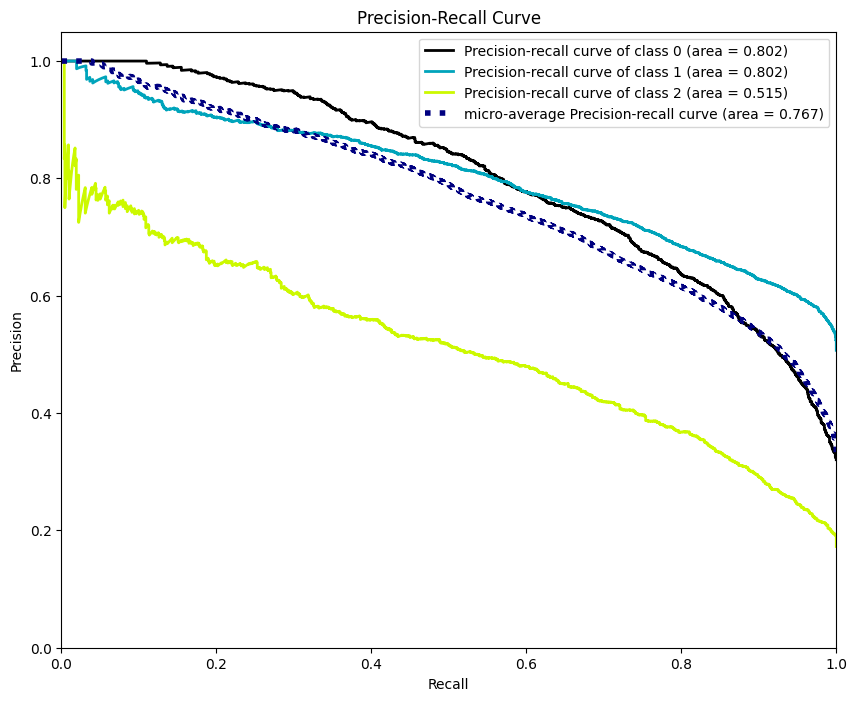

In [99]:
skplt.metrics.plot_precision_recall(y_test, y_probas,figsize=(10,8))
plt.show()

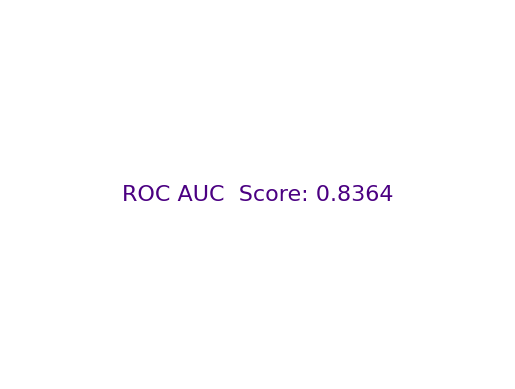

In [100]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pred,multi_class='ovr')
plt.plot([])
plt.text(0,0, f'ROC AUC  Score: {roc_auc:.4f}', fontsize=16, ha='center', va='center',color="indigo")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

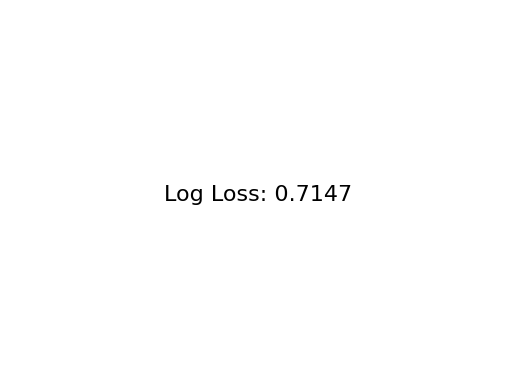

In [101]:
from sklearn.metrics import log_loss,cohen_kappa_score,matthews_corrcoef
logarithm_loss=log_loss(y_test,pred)
plt.plot([])
plt.text(0,0, f'Log Loss: {logarithm_loss:.4f}', fontsize=16, ha='center', va='center',color="black")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

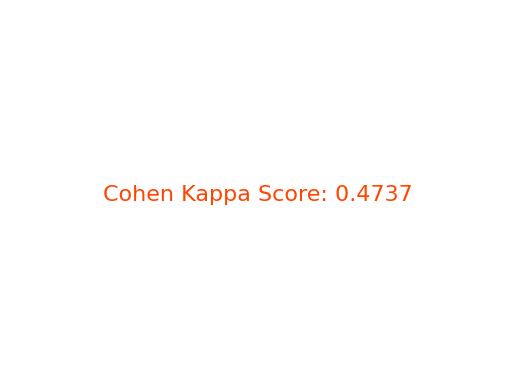

In [102]:
kappa = cohen_kappa_score(y_test,final_pred)
plt.plot([])
plt.text(0,0, f'Cohen Kappa Score: {kappa:.4f}', fontsize=16, ha='center', va='center',color="orangered")
plt.axis('off')

# Set the x-axis limits
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

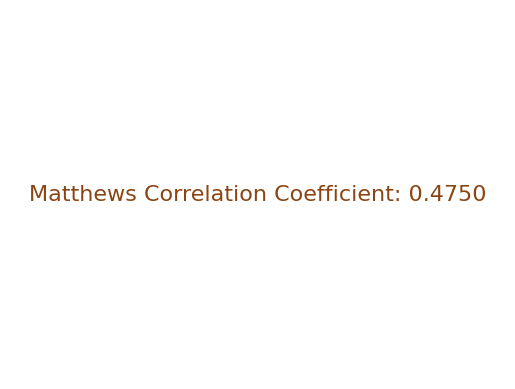

In [103]:
mcc = matthews_corrcoef(y_test, final_pred)
plt.plot([])
plt.text(0,0, f'Matthews Correlation Coefficient: {mcc:.4f}', fontsize=16, ha='center', va='center',color="saddlebrown")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()

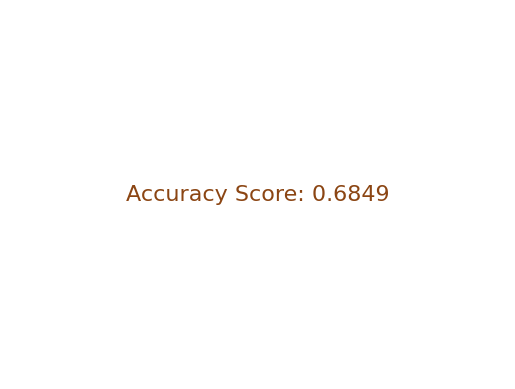

In [104]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, final_pred)
plt.plot([])
plt.text(0, 0, f'Accuracy Score: {accuracy:.4f}', fontsize=16, ha='center', va='center', color="saddlebrown")
plt.axis('off')
plt.xlim(-1, 1)
plt.ylim(-1,1)

plt.show()


# Custom Data prediction

In [105]:
custom_text_data = []  
custom_data = ["Great job! Your model achieved an accuracy score of"]
custom_text_data.extend(custom_data)

combined_onehot_data = [one_hot(text, vocab_size) for text in custom_text_data]

combined_padded_data = pad_sequences(combined_onehot_data, padding='pre', maxlen=max_len)

custom_padded_data = combined_padded_data[-len(custom_data):]

custom_pred = model.predict(custom_padded_data)

custom_final_pred = np.argmax(custom_pred, axis=1)

for p in custom_final_pred:
    if p == 0:
        print("Positive")
    elif p == 1:
        print("Neutral")
    elif p == 2:
        print("Negative")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Positive


In [106]:
custom_text_data = []  
custom_data = ["The movie I watched last night was a complete disaster. The plot was confusing, the acting was terrible, and the special effects were laughable. I wasted two hours of my life and I wouldn't recommend it to anyone."
]
custom_text_data.extend(custom_data)

combined_onehot_data = [one_hot(text, vocab_size) for text in custom_text_data]

combined_padded_data = pad_sequences(combined_onehot_data, padding='pre', maxlen=max_len)

custom_padded_data = combined_padded_data[-len(custom_data):]

custom_pred = model.predict(custom_padded_data)

custom_final_pred = np.argmax(custom_pred, axis=1)

for p in custom_final_pred:
    if p == 0:
        print("Positive")
    elif p == 1:
        print("Neutral")
    elif p == 2:
        print("Negative")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Positive


In [107]:
custom_text_data = []  
custom_data = ["I went to the grocery store and bought some fruits and vegetables. Then, I stopped by the bank to deposit a check. After that, I headed home to prepare dinner."
]
custom_text_data.extend(custom_data)

combined_onehot_data = [one_hot(text, vocab_size) for text in custom_text_data]

combined_padded_data = pad_sequences(combined_onehot_data, padding='pre', maxlen=max_len)

custom_padded_data = combined_padded_data[-len(custom_data):]

custom_pred = model.predict(custom_padded_data)

custom_final_pred = np.argmax(custom_pred, axis=1)

for p in custom_final_pred:
    if p == 0:
        print("Positive")
    elif p == 1:
        print("Neutral")
    elif p == 2:
        print("Negative")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Neutral
